<h1>Overview<h1>

Our objective is to conduct a comprehensive exploratory data analysis (EDA) on the provided dataset to gain a deeper understanding of the characteristics of the cars listed. We will focus primarily on analyzing the numerical variables, namely the year of sale, selling price, and mileage (km driven), to uncover patterns, trends, and potential insights.

To begin, we will start by examining the central tendencies of these numerical variables. This includes calculating measures such as the mean, median, and mode for each variable. Understanding the central tendencies will provide us with insights into the average values and distribution of the data points across these variables.

Next, we will explore the spread or variability within the dataset. This involves analyzing metrics such as the range, variance, and standard deviation of the numerical variables. By examining the spread, we can identify how much the data points deviate from the central tendencies and gain insights into the variability of the data.

Additionally, we will investigate the skewness of the numerical variables to understand the asymmetry in their distributions. Skewness measures the lack of symmetry in the data distribution, indicating whether the data is skewed towards higher or lower values. This analysis will help us identify any potential biases or anomalies in the data distribution.

Furthermore, we will explore the presence of clusters and modality within the dataset. Clusters refer to groups or patterns within the data, while modality indicates the number of peaks or modes in the distribution. Identifying clusters and modality can reveal underlying structures or patterns in the data that may not be immediately apparent.

Another crucial aspect of our analysis will be examining the impact of outliers on the dataset. Outliers are data points that significantly deviate from the rest of the data and can influence the overall analysis. We will identify and analyze outliers within the numerical variables to understand their effect on the central tendencies, spread, and overall distribution of the data.

As we progress with our analysis, we will integrate nominal variables into the exploration to observe how the dataset changes with the inclusion of additional attributes. This comparative analysis will provide insights into how different attributes interact and influence the overall dataset characteristics.

To facilitate our analysis and interpretation, we will utilize visual summaries such as histograms, box plots, scatter plots, and line charts. These visualizations will offer a comprehensive overview of the data distribution, relationships between variables, and help us delve deeper into each specific variable and the five key measures of interest.

Overall, our EDA process will be iterative, starting with a general overview of the dataset and gradually delving deeper into each variable to answer substantive questions about the cars' characteristics and statistical understanding of the numerical variables.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import statistics as st
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.preprocessing import LabelEncoder

<h1>Data<h1>

In [ ]:
cars_df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
print(cars_df.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')


In [ ]:
cars_df['Brand'] = cars_df.name.apply(lambda x: ' '.join(x.split(' ')[:1]))
cars_df['Brand']

0        Maruti
1        Maruti
2       Hyundai
3        Datsun
4         Honda
         ...   
4335    Hyundai
4336    Hyundai
4337     Maruti
4338    Hyundai
4339    Renault
Name: Brand, Length: 4340, dtype: object

In [ ]:
cars_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [ ]:
cars_df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Brand
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner,Renault


In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
 8   Brand          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [ ]:
cars_df.shape

(4340, 9)

In [ ]:
cars_df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
cars_df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
Brand            0
dtype: int64

In [ ]:
cars_df.Brand.value_counts()

Brand
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: count, dtype: int64

<h1>Model<h1>

This dataset provides a comprehensive view of various car models, detailing their attributes such as name, year of manufacture, selling price, kilometers driven, fuel type, seller type, transmission type, owner history, and brand. This wealth of information allows for thorough analysis and exploration of trends, patterns, and relationships within the automotive industry. Before delving into visual summaries, we conducted descriptive statistics on our three numerical variables. Initially, we examined the dataset in a pandas dataframe to understand its structure, verified the data types of each attribute for appropriate statistical analysis, assessed its shape, conducted statistical analyses, and checked for null values. Addressing null values during data cleaning is crucial as they can impact exploratory data analysis outcomes. As part of our analysis, we introduced a new column named Brand, which we found more descriptive and useful than the car name itself for our exploration and understanding of the dataset.

<h1>Data Visualization<h1>

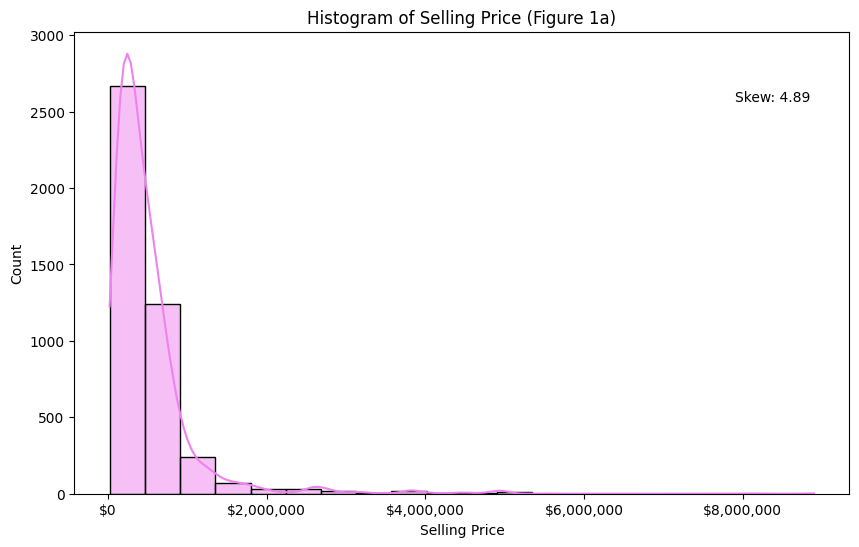

In [ ]:
selling_prices = cars_df['selling_price']
selling_skewness = selling_prices.skew()

def currency_formatter(x, pos):
    return f'${x:,.0f}'

plt.figure(figsize=(10,6))
sb.histplot(selling_prices, kde=True, color='violet', bins=20)
plt.title('Histogram of Selling Price (Figure 1a)')
plt.xlabel('Selling Price')
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.text(0.95, 0.85, f'Skew: {selling_skewness:.2f}', transform=plt.gca().transAxes, ha='right', fontsize = 10)
plt.show()

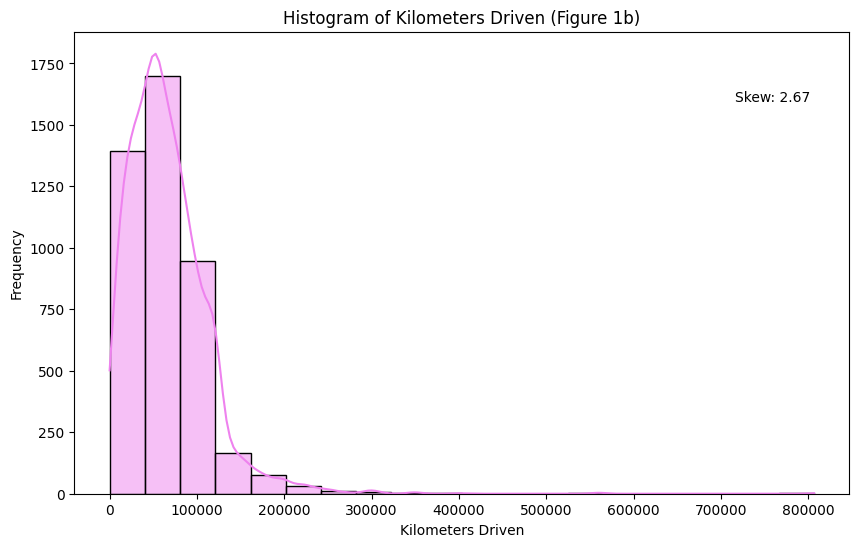

In [ ]:
km_driven = cars_df['km_driven']
km_skewness = km_driven.skew()

plt.figure(figsize=(10, 6))
sb.histplot(data=cars_df, x='km_driven', kde=True, color='violet', bins=20)
plt.title('Histogram of Kilometers Driven (Figure 1b)')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.text(0.95, 0.85, f'Skew: {km_skewness:.2f}', transform=plt.gca().transAxes, ha='right', fontsize=10)
plt.show()

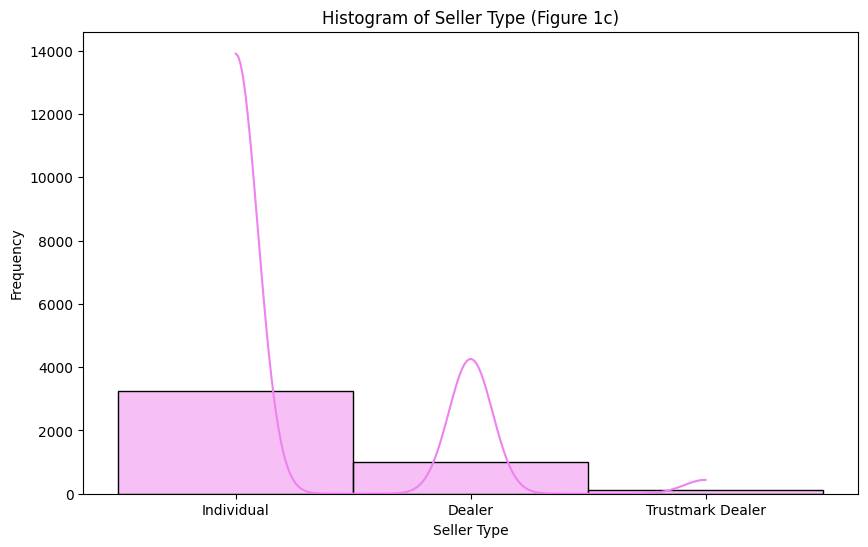

In [ ]:
plt.figure(figsize=(10, 6))
sb.histplot(data=cars_df, x='seller_type', kde = True, color='violet')
plt.title('Histogram of Seller Type (Figure 1c)')
plt.xlabel('Seller Type')
plt.ylabel('Frequency')
plt.show()

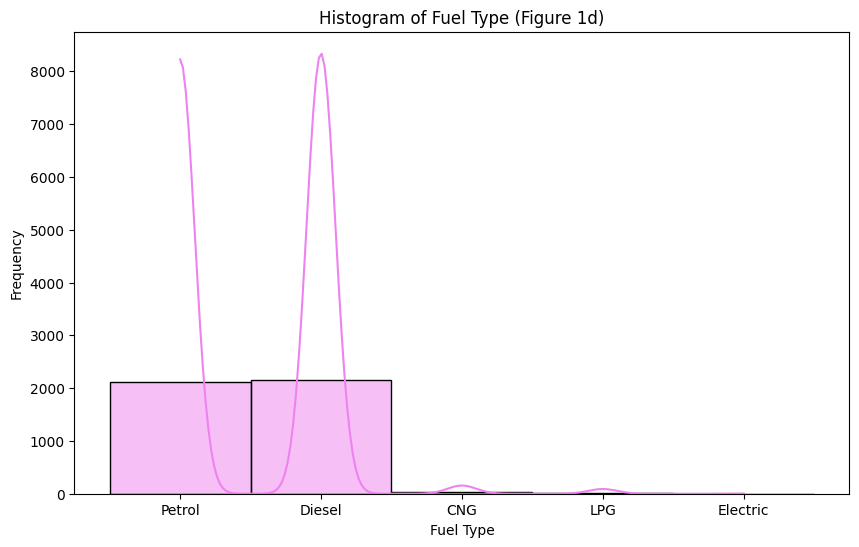

In [ ]:
plt.figure(figsize=(10, 6))
sb.histplot(data=cars_df, x='fuel', kde = True, color='violet')
plt.title('Histogram of Fuel Type (Figure 1d)')
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Histogram of Year (Figure 1e)')

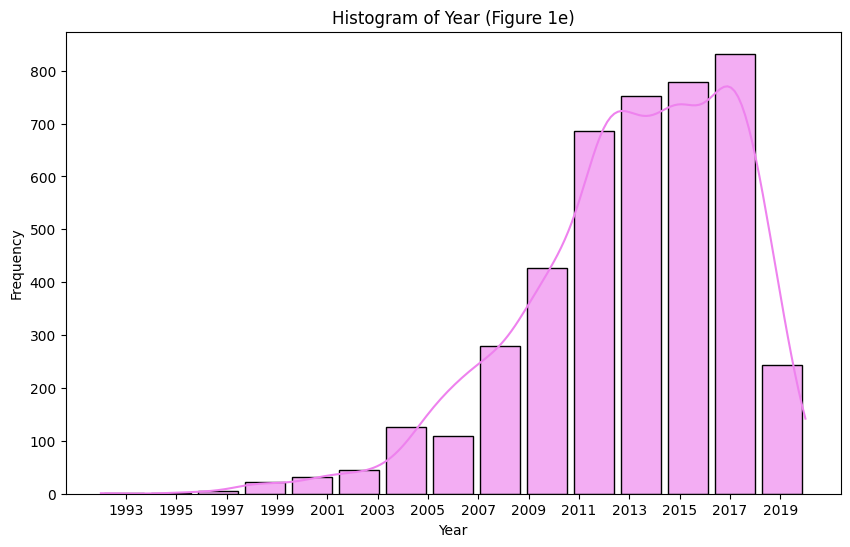

In [ ]:
plt.figure(figsize=(10,6))
sb.histplot(data=cars_df,x=cars_df['year'], bins=15,color='violet', kde = True, edgecolor='k', alpha=0.65,shrink=0.85)
plt.xlabel("Year",fontsize = 10)
plt.ylabel("Frequency")
plt.xticks([num for num in range(1993,2020,2)],
            [str(num) for num in range(1993,2020,2)])
plt.title("Histogram of Year (Figure 1e)")

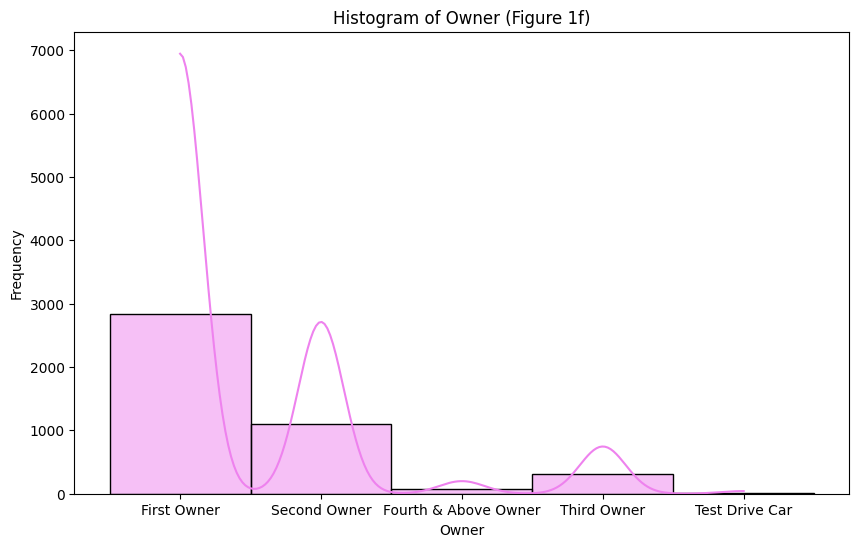

In [ ]:
plt.figure(figsize=(10, 6))
sb.histplot(data=cars_df, x='owner', kde = True, color='violet')
plt.title('Histogram of Owner (Figure 1f)')
plt.xlabel('Owner')
plt.ylabel('Frequency')
plt.show()

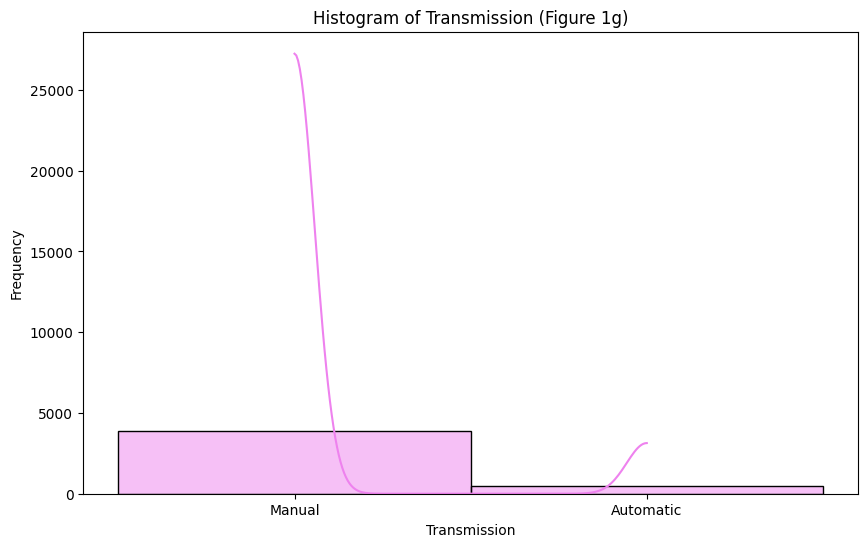

In [ ]:
plt.figure(figsize=(10, 6))
sb.histplot(data=cars_df, x='transmission', kde = True, color='violet')
plt.title('Histogram of Transmission (Figure 1g)')
plt.xlabel('Transmission')
plt.ylabel('Frequency')
plt.show()

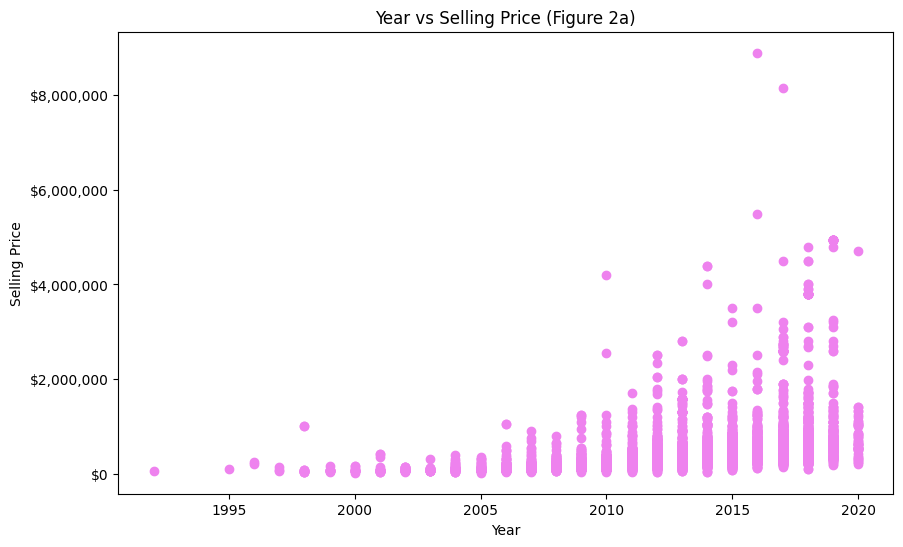

In [ ]:
def currency_formatter(x, pos):
    return f'${x:,.0f}'

fig, ax = plt.subplots(figsize=(10,6 ))
ax.scatter(cars_df['year'], cars_df['selling_price'], color='violet')
ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))
ax.set_title('Year vs Selling Price (Figure 2a)')
ax.set_xlabel('Year')
ax.set_ylabel('Selling Price')
plt.show()

In [ ]:
sorted_prices = sorted(cars_df['selling_price'], reverse=True)
print("Highest Selling Prices:")
for price in sorted_prices[:2]:
    print(f"${price:,.0f}")

filtered_df = cars_df[cars_df['year'] < 1995]

for index, row in filtered_df.iterrows():
    print(f"Year: {row['year']}, Selling Price: ${row['selling_price']:,.0f}")

Highest Selling Prices:
$8,900,000
$8,150,000
Year: 1992, Selling Price: $50,000


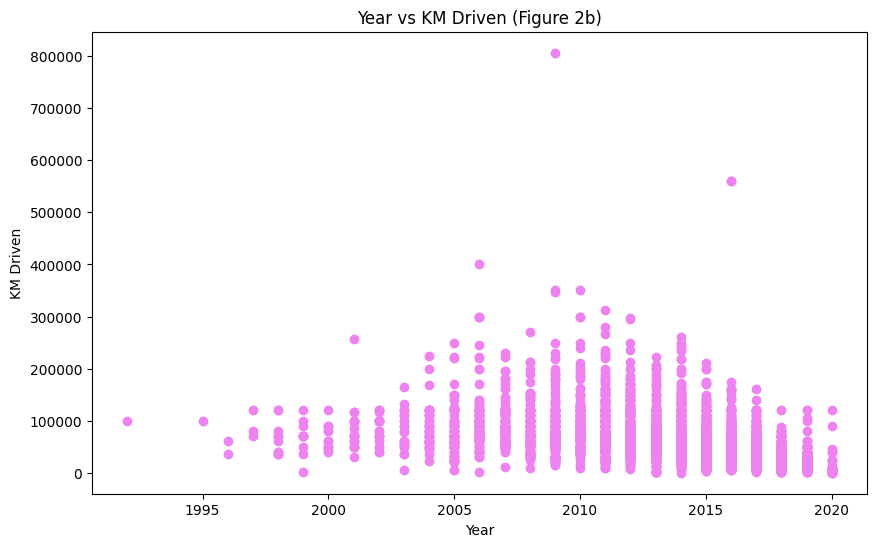

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(cars_df['year'], cars_df['km_driven'], color = 'violet')
ax.set_title('Year vs KM Driven (Figure 2b)')
ax.set_xlabel('Year')
ax.set_ylabel('KM Driven')
plt.show()

In [ ]:
sorted_df = cars_df.sort_values(by='km_driven', ascending=False)
print("Cars with the Highest Km Driven:")
for index, row in sorted_df.head(2).iterrows():
    print(f"Year: {row['year']}, Km Driven: {row['km_driven']} km, Selling Price: ${row['selling_price']:,.0f}")

Cars with the Highest Km Driven:
Year: 2009, Km Driven: 806599 km, Selling Price: $250,000
Year: 2016, Km Driven: 560000 km, Selling Price: $665,000


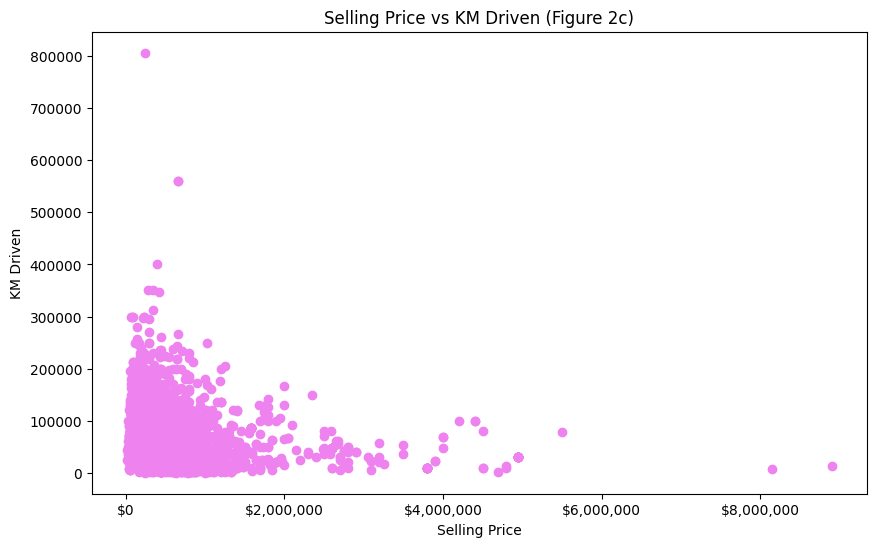

In [ ]:
def currency_formatter(x, pos):
    return f'${x:,.0f}'

plt.figure(figsize=(10,6))
plt.scatter(cars_df['selling_price'], cars_df['km_driven'], color = 'violet')
plt.title('Selling Price vs KM Driven (Figure 2c)')
plt.ylabel('KM Driven')
plt.xlabel('Selling Price')
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.show()

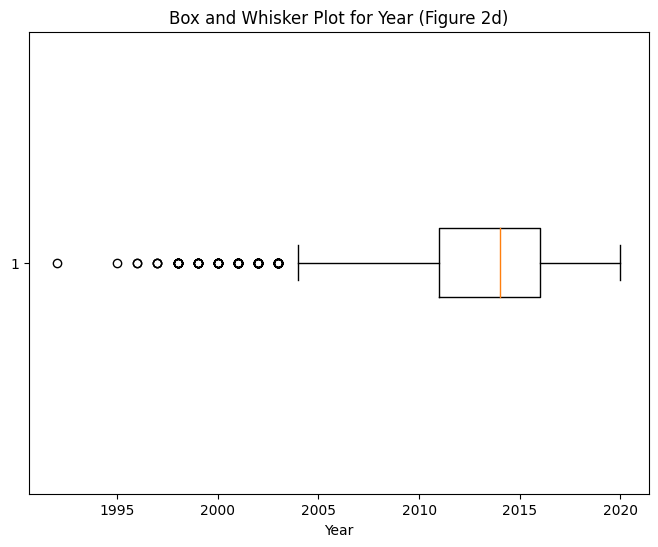

In [ ]:
plt.figure(figsize=(8,6))
plt.boxplot(cars_df['year'], vert=False)
plt.title('Box and Whisker Plot for Year (Figure 2d)')
plt.xlabel('Year')
plt.show()

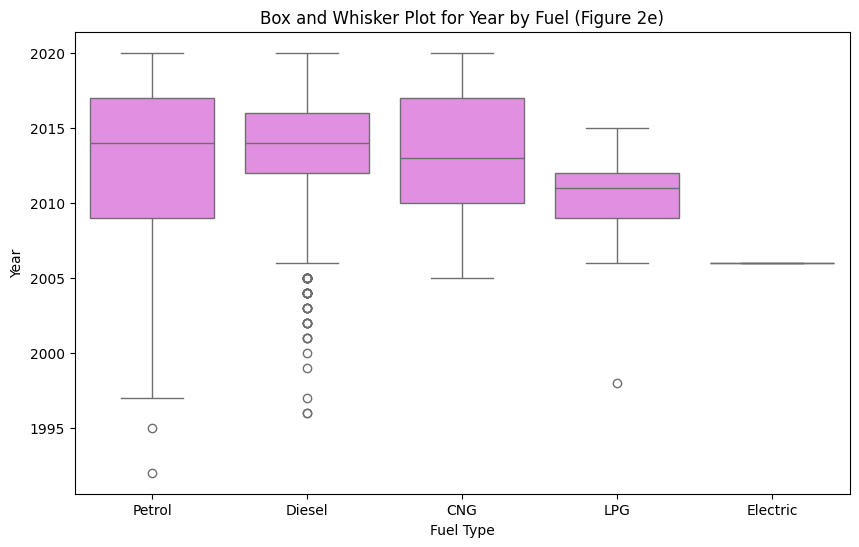

In [ ]:
plt.figure(figsize=(10,6))
sb.boxplot(x='fuel', y='year', data=cars_df, color='violet')
plt.title('Box and Whisker Plot for Year by Fuel (Figure 2e)')
plt.ylabel('Year')
plt.xlabel('Fuel Type')
plt.show()

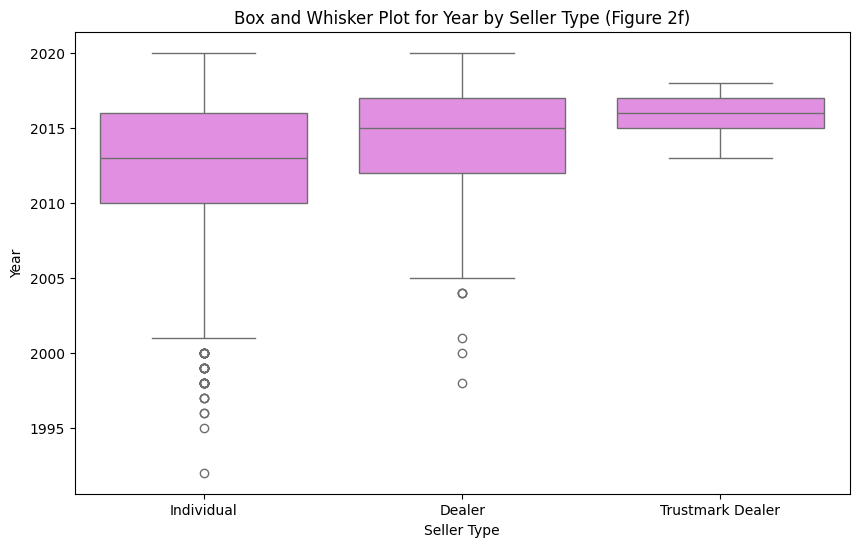

In [ ]:
plt.figure(figsize=(10,6))
sb.boxplot(x='seller_type', y='year', data=cars_df, color = 'violet')
plt.title('Box and Whisker Plot for Year by Seller Type (Figure 2f)')
plt.ylabel('Year')
plt.xlabel('Seller Type')
plt.show()

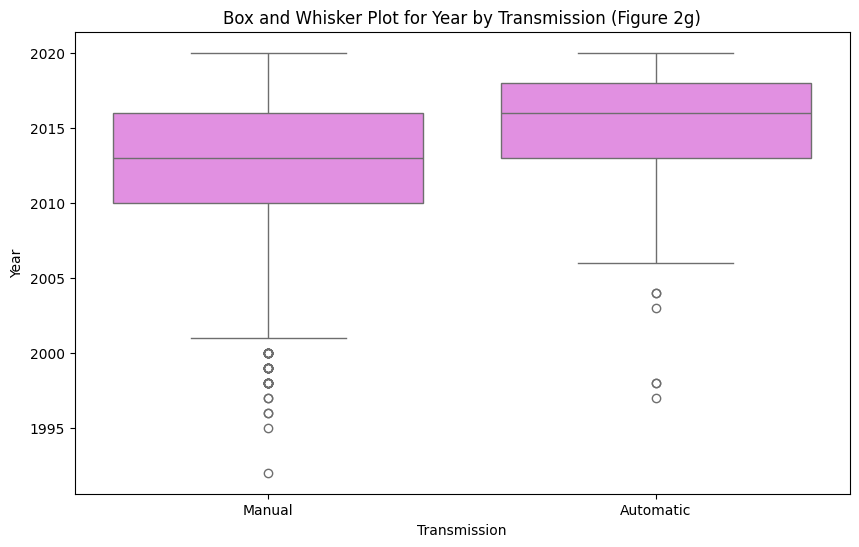

In [ ]:
plt.figure(figsize=(10,6))
sb.boxplot(x='transmission', y='year', data=cars_df, color = 'violet')
plt.title('Box and Whisker Plot for Year by Transmission (Figure 2g)')
plt.ylabel('Year')
plt.xlabel('Transmission')
plt.show()

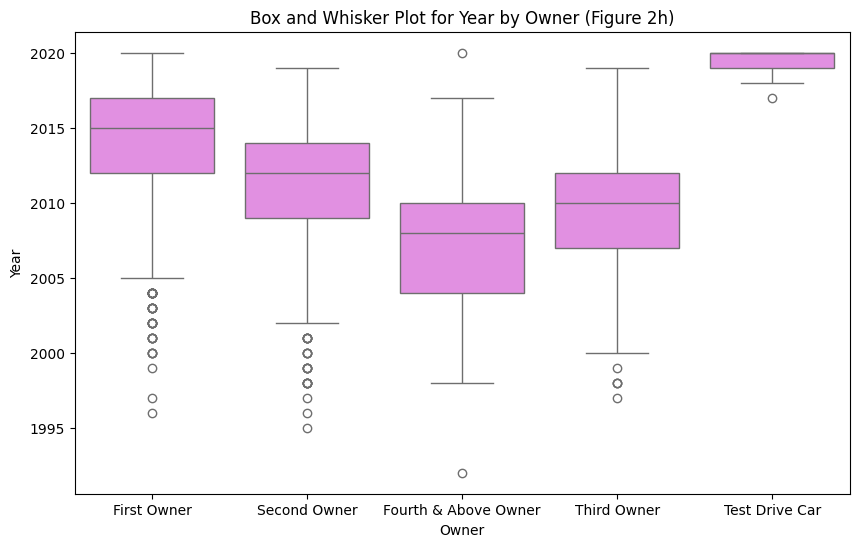

In [ ]:
plt.figure(figsize=(10,6))
sb.boxplot(x='owner', y='year', data=cars_df, color = 'violet')
plt.title('Box and Whisker Plot for Year by Owner (Figure 2h)')
plt.ylabel('Year')
plt.xlabel('Owner')
plt.show()

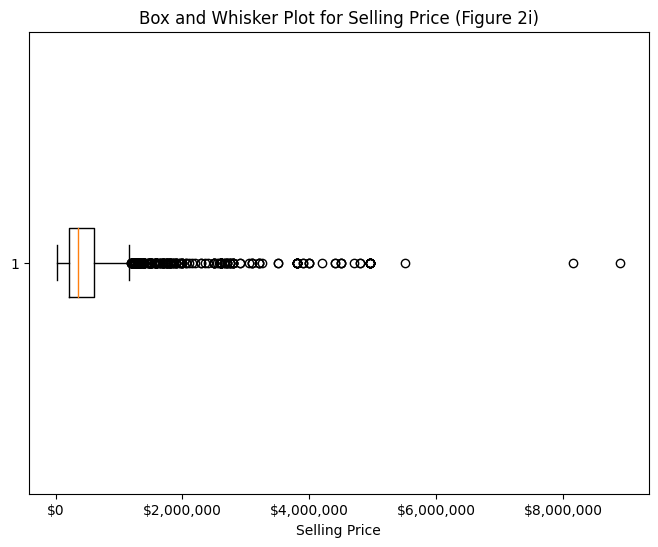

In [ ]:
def currency_formatter(x, pos):
    return f'${x:,.0f}'

plt.figure(figsize=(8,6))
plt.boxplot(cars_df['selling_price'], vert=False)
plt.title('Box and Whisker Plot for Selling Price (Figure 2i)')
plt.xlabel('Selling Price')
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.show()

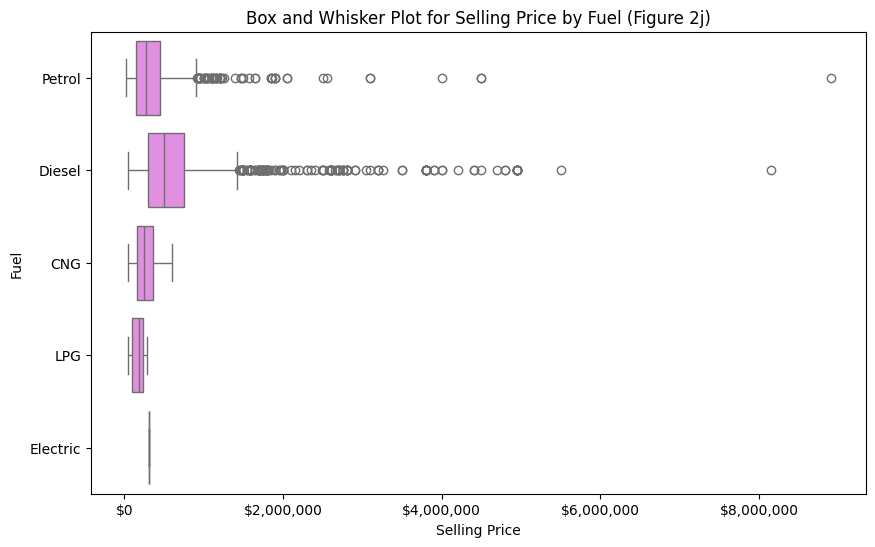

In [ ]:
def currency_formatter(x, pos):
    return f'${x:,.0f}'

plt.figure(figsize=(10, 6))
sb.boxplot(x='selling_price', y='fuel', data=cars_df, color = 'violet')
plt.title('Box and Whisker Plot for Selling Price by Fuel (Figure 2j)')
plt.xlabel('Selling Price')
plt.ylabel('Fuel')
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.show()

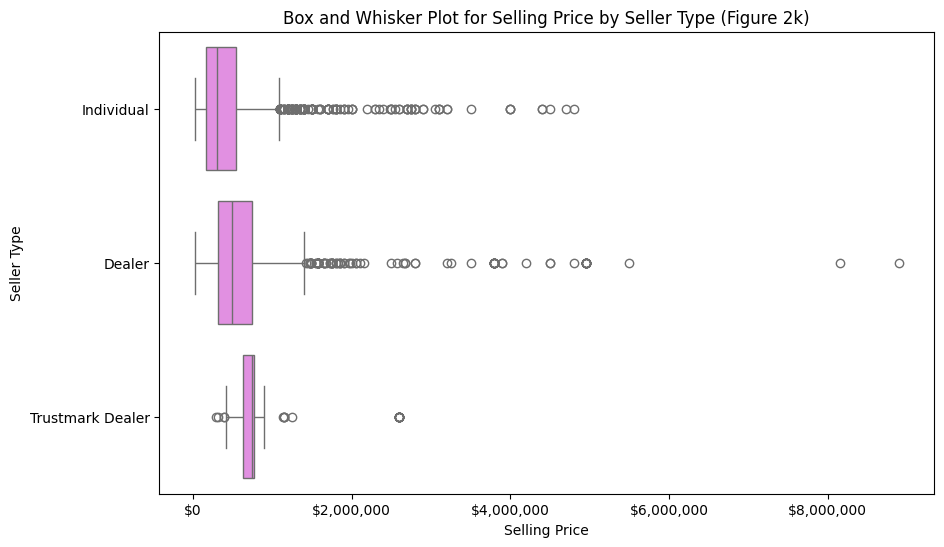

In [ ]:
def currency_formatter(x, pos):
    return f'${x:,.0f}'

plt.figure(figsize=(10, 6))
sb.boxplot(x='selling_price', y='seller_type', data=cars_df, color = 'violet')
plt.title('Box and Whisker Plot for Selling Price by Seller Type (Figure 2k)')
plt.xlabel('Selling Price')
plt.ylabel('Seller Type')
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.show()

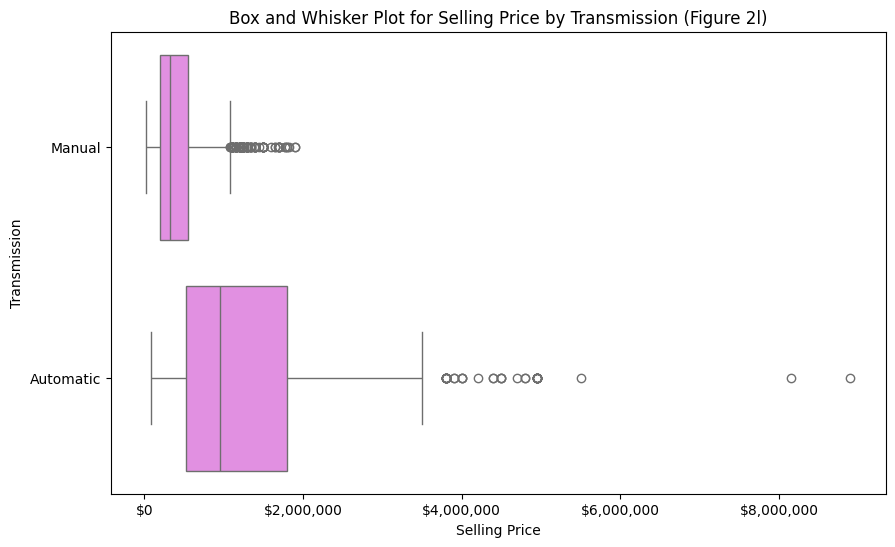

In [ ]:
def currency_formatter(x, pos):
    return f'${x:,.0f}'

plt.figure(figsize=(10, 6))
sb.boxplot(x='selling_price', y='transmission', data=cars_df, color = 'violet')
plt.title('Box and Whisker Plot for Selling Price by Transmission (Figure 2l)')
plt.xlabel('Selling Price')
plt.ylabel('Transmission')
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.show()

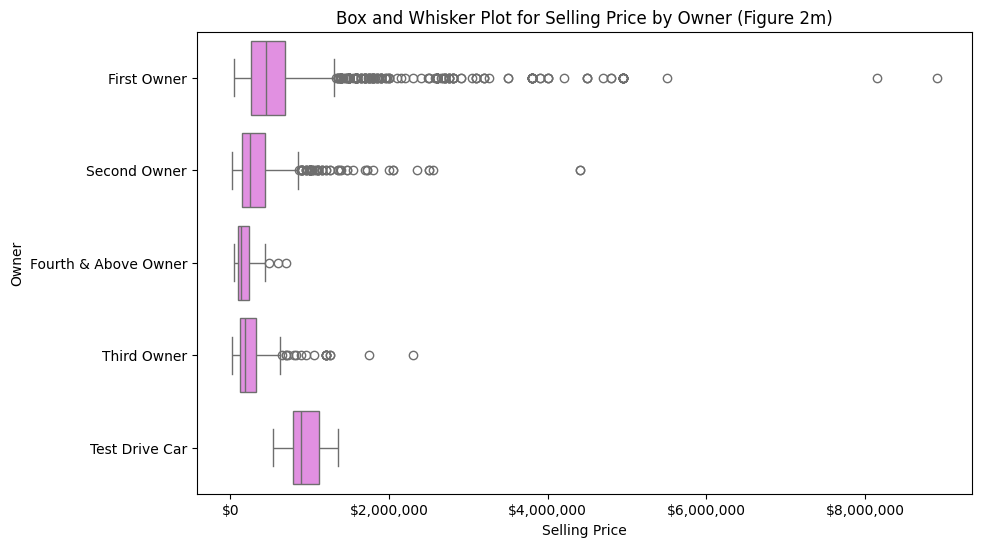

In [ ]:
def currency_formatter(x, pos):
    return f'${x:,.0f}'

plt.figure(figsize=(10, 6))
sb.boxplot(x='selling_price', y='owner', data=cars_df, color = 'violet')
plt.title('Box and Whisker Plot for Selling Price by Owner (Figure 2m)')
plt.xlabel('Selling Price')
plt.ylabel('Owner')
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.show()

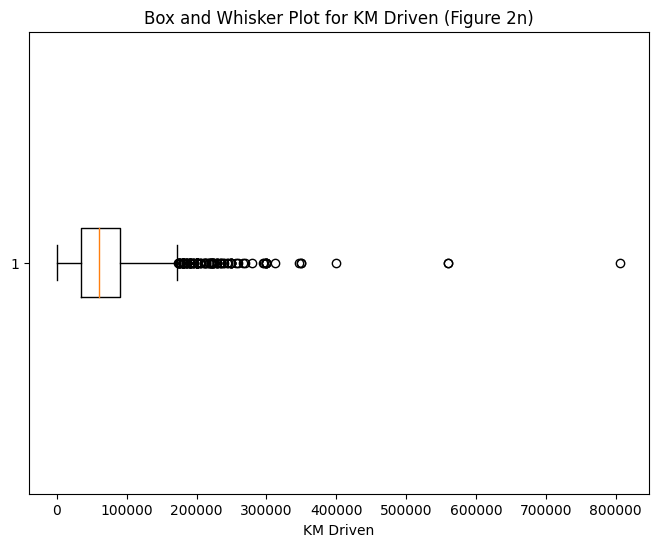

In [ ]:
plt.figure(figsize=(8,6))
plt.boxplot(cars_df['km_driven'], vert=False)
plt.title('Box and Whisker Plot for KM Driven (Figure 2n)')
plt.xlabel('KM Driven')
plt.show()

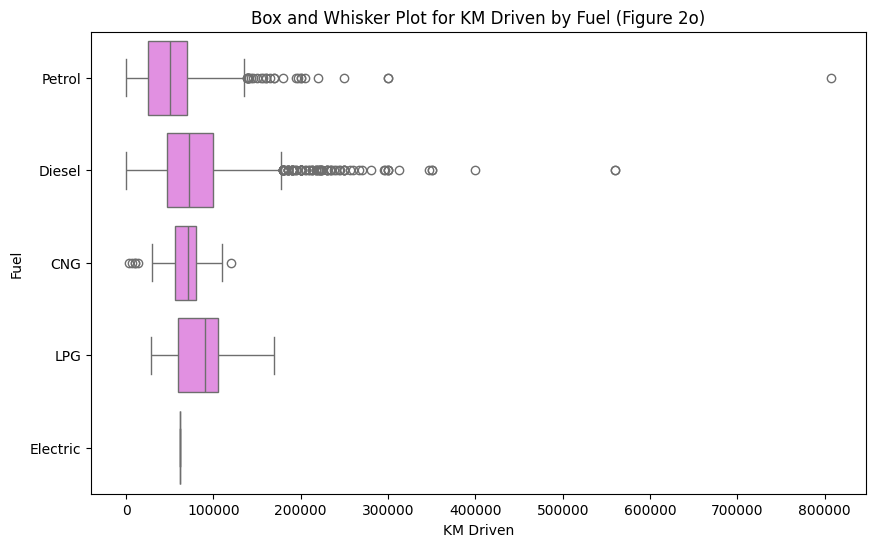

In [ ]:
plt.figure(figsize=(10, 6))
sb.boxplot(x='km_driven', y='fuel', data=cars_df, color = 'violet')
plt.title('Box and Whisker Plot for KM Driven by Fuel (Figure 2o)')
plt.xlabel('KM Driven')
plt.ylabel('Fuel')
plt.show()

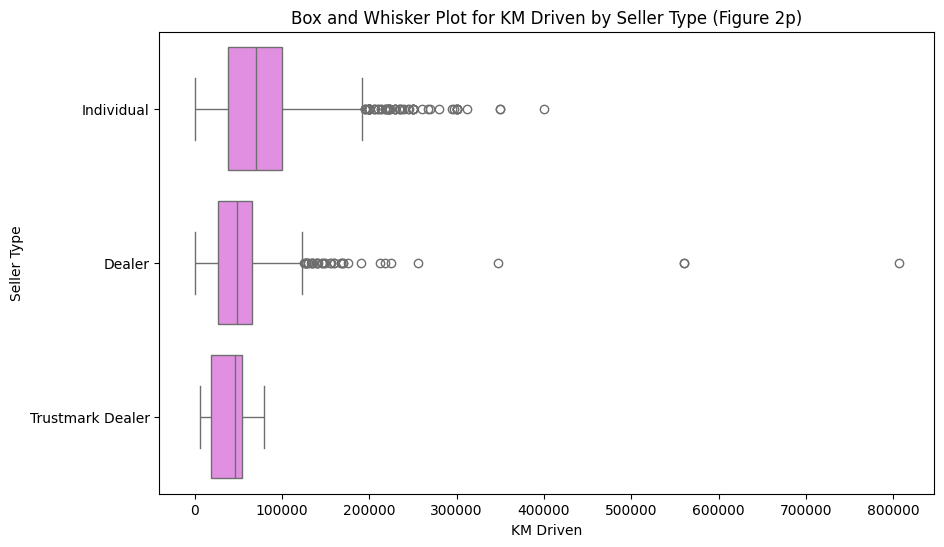

In [ ]:
plt.figure(figsize=(10, 6))
sb.boxplot(x='km_driven', y='seller_type', data=cars_df, color = 'violet')
plt.title('Box and Whisker Plot for KM Driven by Seller Type (Figure 2p)')
plt.xlabel('KM Driven')
plt.ylabel('Seller Type')
plt.show()

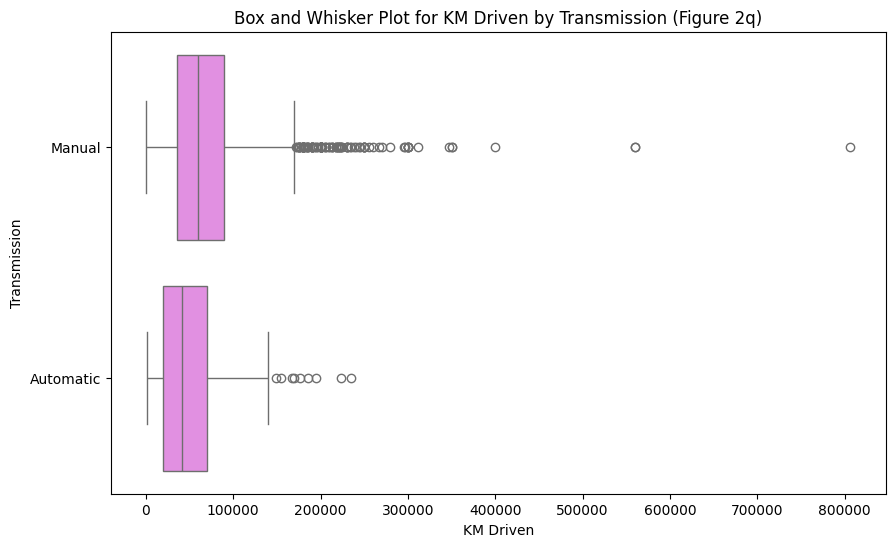

In [ ]:
plt.figure(figsize=(10, 6))
sb.boxplot(x='km_driven', y='transmission', data=cars_df, color='violet')
plt.title('Box and Whisker Plot for KM Driven by Transmission (Figure 2q)')
plt.xlabel('KM Driven')
plt.ylabel('Transmission')
plt.show()

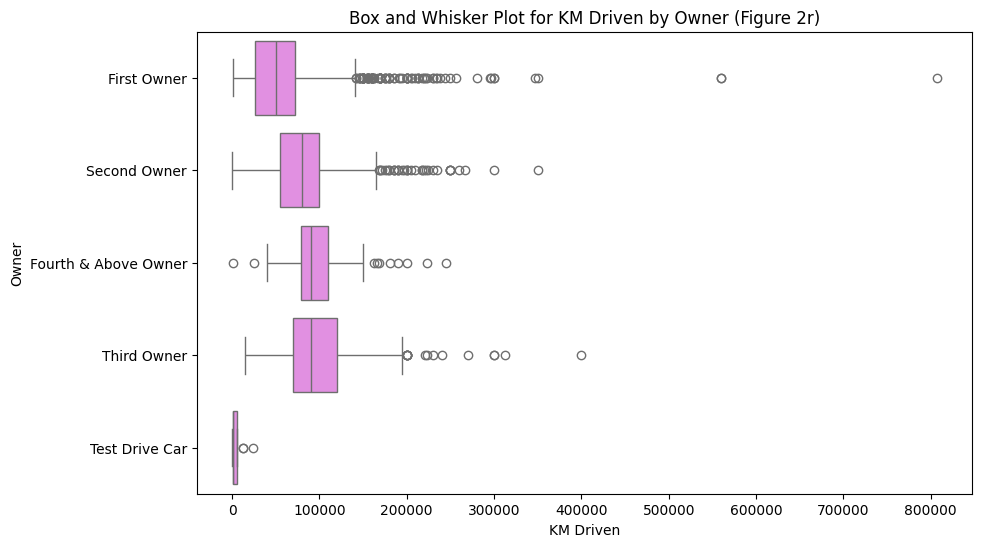

In [ ]:
plt.figure(figsize=(10, 6))
sb.boxplot(x='km_driven', y='owner', data=cars_df, color = 'violet')
plt.title('Box and Whisker Plot for KM Driven by Owner (Figure 2r)')
plt.xlabel('KM Driven')
plt.ylabel('Owner')
plt.show()

In [ ]:
df1 = cars_df.copy()
centerDict = {}
def calculateCenter(col):
    m = st.mean(df1[col])
    me = st.median(df1[col].sort_values())
    mo = st.mode(df1[col])
    centerDict= {
        'mean':m,
        'median':me,
        'mode':mo
    }
    return centerDict

Text(0.5, 1.0, 'Central Tendency of Selling Price (Figure 3a)')

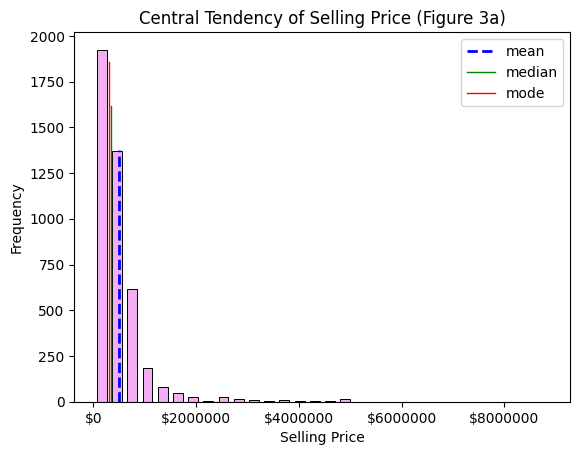

In [ ]:
ax=sb.histplot(data=df1,x=df1['selling_price'],bins=30,color='violet', edgecolor='k', alpha=0.65,shrink=0.65)
value = calculateCenter('selling_price')
plt.axvline(value.get('mean'), color='blue', linestyle='dashed',linewidth=2,ymin=0,ymax=0.68)
plt.axvline(value.get('median'), color='green', linestyle='solid', linewidth=1,ymin=0,ymax=0.80)
plt.axvline(value.get('mode'), color='red', linewidth=1,ymin=0,ymax=0.92)
plt.xlabel("Selling Price",fontsize = 10)
plt.ylabel("Frequency")
plt.ticklabel_format(style='plain')
ax.xaxis.set_major_formatter('${x:1.0f}')
plt.legend(labels = ['mean','median','mode'],loc=1)
plt.title("Central Tendency of Selling Price (Figure 3a)",loc='center')




In [ ]:
values = calculateCenter('selling_price')
print(f'Average (Mean) Selling Price: ${values.get("mean"):.2f}\nMedian Selling Price: ${values.get("median"):.2f}\nMode Selling Price: ${values.get("mode"):.2f}')

Average (Mean) Selling Price: $504127.31
Median Selling Price: $350000.00
Mode Selling Price: $300000.00


Text(0.5, 1.0, 'Central Tendency of KM Driven (Figure 3b)')

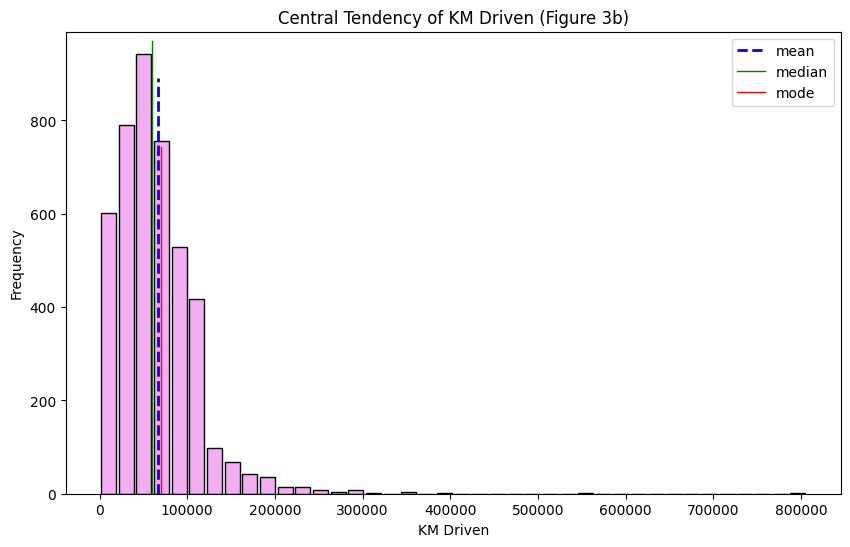

In [ ]:
plt.figure(figsize=(10,6))
sb.histplot(data=df1,x=df1['km_driven'], bins=40,color='violet', edgecolor='k', alpha=0.65,shrink=0.85)
value = calculateCenter('km_driven')
plt.axvline(value.get('mean'), color='blue', linestyle='dashed',linewidth=2,ymin=0,ymax=0.90)
plt.axvline(value.get('median'), color='green', linestyle='solid', linewidth=1,ymin=0,ymax=0.98)
plt.axvline(value.get('mode'), color='red', linewidth=1,ymin=0,ymax=0.75)
plt.xlabel("KM Driven")
plt.ylabel("Frequency")
plt.legend(labels = ['mean','median','mode'],loc=1)
plt.title("Central Tendency of KM Driven (Figure 3b)")

In [ ]:
values = calculateCenter('km_driven')
print(f'Average (Mean) KM Driven: {values.get("mean"):.2f}\nMedian KM Driven: {values.get("median"):.2f}\nMode KM Driven: {values.get("mode"):.2f}')

Average (Mean) KM Driven: 66215.78
Median KM Driven: 60000.00
Mode KM Driven: 70000.00


Text(0.5, 1.0, 'Central Tendency of Year (Figure 3c)')

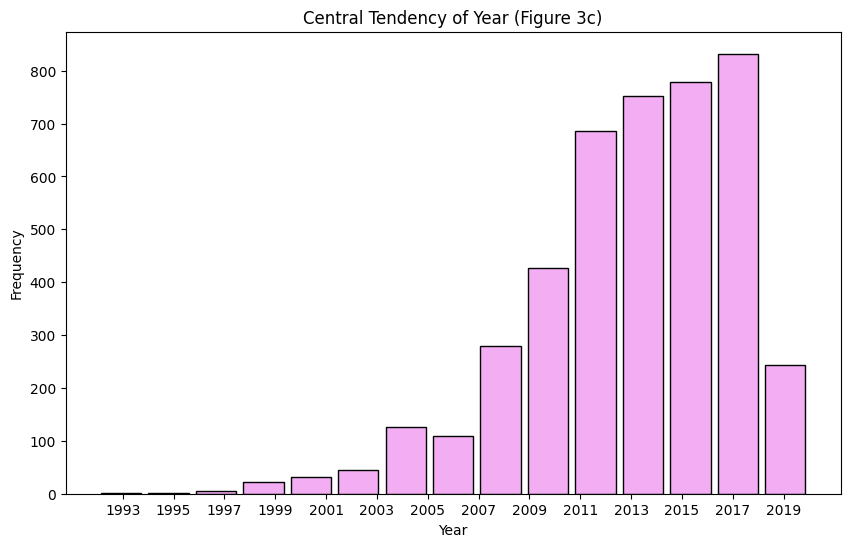

In [ ]:
plt.figure(figsize=(10,6))
sb.histplot(data=df1,x=df1['year'], bins=15,color='violet', edgecolor='k', alpha=0.65,shrink=0.85)
plt.xlabel("Year",fontsize = 10)
plt.ylabel("Frequency")
plt.xticks([num for num in range(1993,2020,2)],
            [str(num) for num in range(1993,2020,2)])
plt.title("Central Tendency of Year (Figure 3c)")

In [ ]:
mo = st.mode(df1['year'])
print("The most occurring year is",mo)

The most occurring year is 2017


Text(0.5, 1.0, 'Owner Type (Figure 3d)')

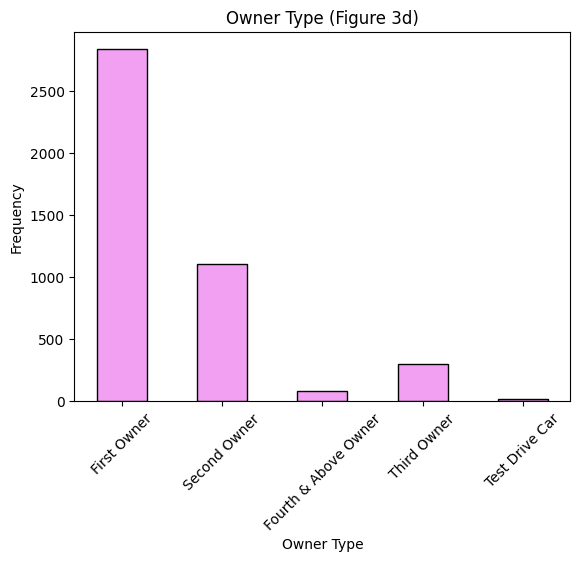

In [ ]:
ax=sb.histplot(data=df1,x='owner',binwidth=10,shrink=0.50,stat='frequency',color='violet')
ax.tick_params(axis='x', labelrotation=45)
plt.xlabel("Owner Type")
plt.ylabel("Frequency")
plt.title("Owner Type (Figure 3d)")

In [ ]:
ownerMode = st.mode(df1['owner'])
print("The {0} is the most common owner in the data set".format(ownerMode))

The First Owner is the most common owner in the data set


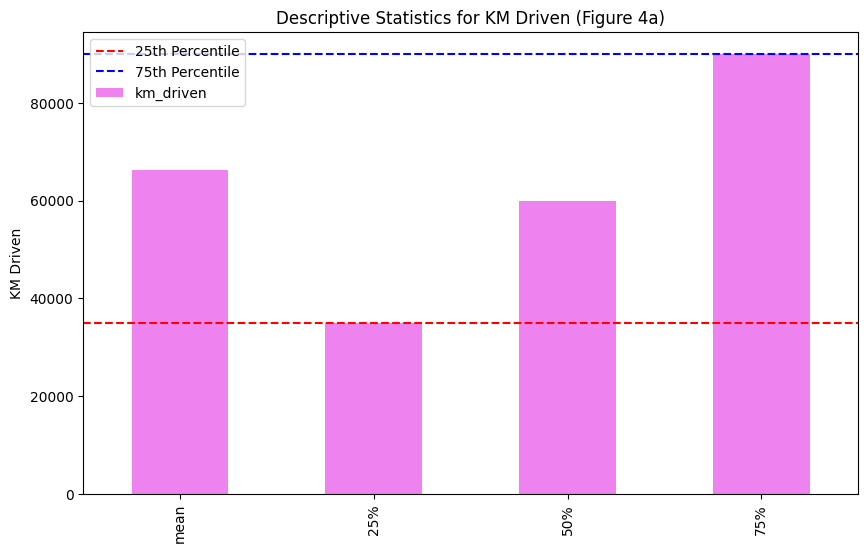


Kilometers Driven Statistics:
count      4340.000000
mean      66215.777419
std       46644.102194
min           1.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      806599.000000
Name: km_driven, dtype: float64
IQR for Kilometers Driven: 55,000.00 km


In [ ]:
stats_km = cars_df['km_driven'].describe()
iqr_km = stats_km['75%'] - stats_km['25%']
plt.figure(figsize=(10, 6))
stats_km.drop(['count', 'std', 'min', 'max']).plot(kind='bar', color='violet')
plt.title('Descriptive Statistics for KM Driven (Figure 4a)')
plt.ylabel('KM Driven')
plt.axhline(y=stats_km['25%'], color='r', linestyle='--', label='25th Percentile')
plt.axhline(y=stats_km['75%'], color='b', linestyle='--', label='75th Percentile')
plt.legend()
plt.show()
print("\nKilometers Driven Statistics:")
print(stats_km)
print(f"IQR for Kilometers Driven: {iqr_km:,.2f} km")


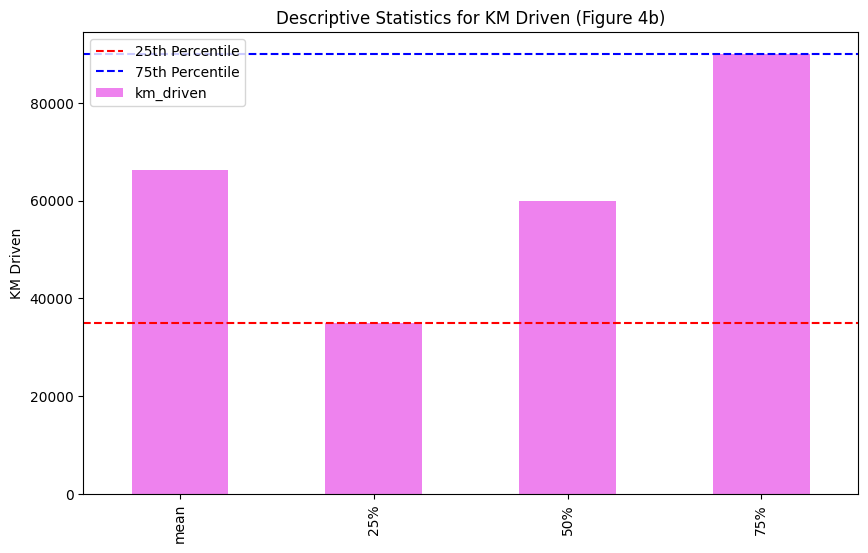


Kilometers Driven Statistics:
count      4340.000000
mean      66215.777419
std       46644.102194
min           1.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      806599.000000
Name: km_driven, dtype: float64
IQR for Kilometers Driven: 55,000.00 km


In [ ]:
stats_km = cars_df['km_driven'].describe()
iqr_km = stats_km['75%'] - stats_km['25%']
plt.figure(figsize=(10, 6))
stats_km.drop(['count', 'std', 'min', 'max']).plot(kind='bar', color='violet')
plt.title('Descriptive Statistics for KM Driven (Figure 4b)')
plt.ylabel('KM Driven')
plt.axhline(y=stats_km['25%'], color='r', linestyle='--', label='25th Percentile')
plt.axhline(y=stats_km['75%'], color='b', linestyle='--', label='75th Percentile')
plt.legend()
plt.show()

print("\nKilometers Driven Statistics:")
print(stats_km)
print(f"IQR for Kilometers Driven: {iqr_km:,.2f} km")


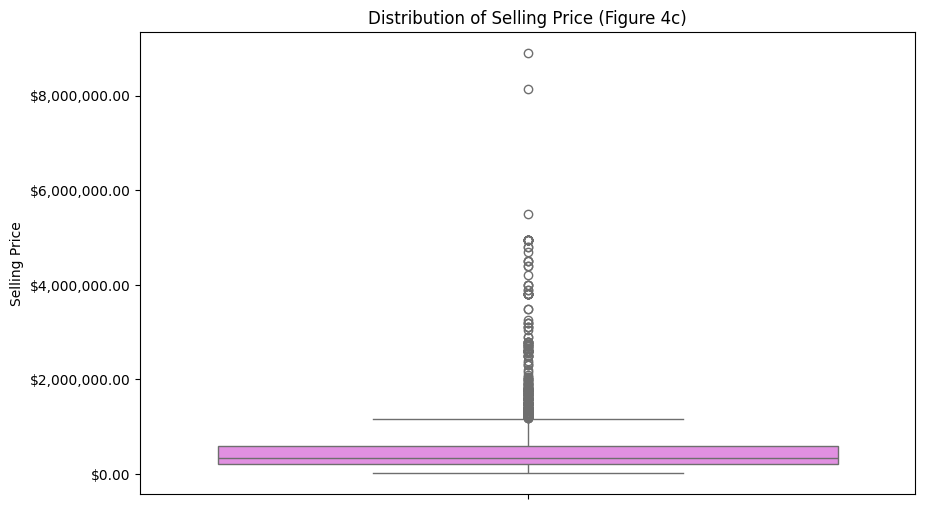

In [ ]:
plt.figure(figsize=(10, 6))
sb.boxplot(y=cars_df['selling_price'], color='violet')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.2f}'))
plt.title('Distribution of Selling Price (Figure 4c)')
plt.ylabel("Selling Price")
plt.show()

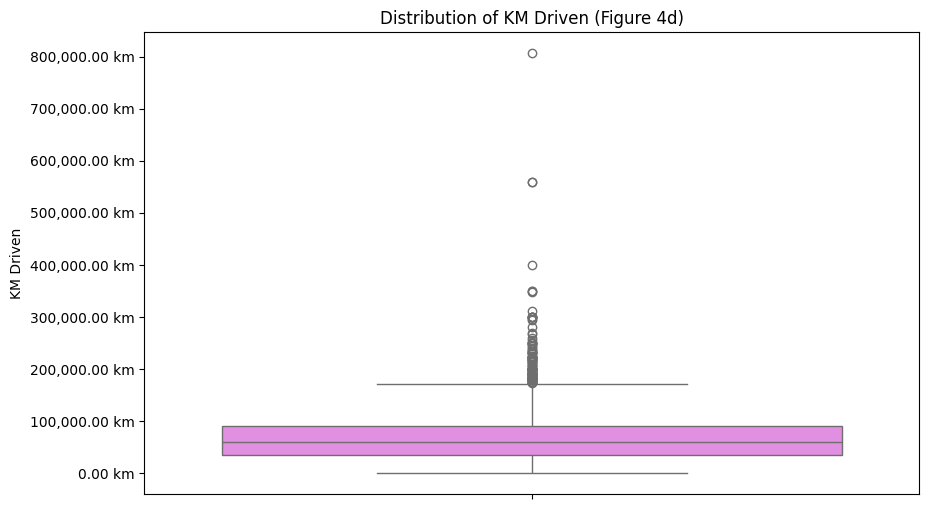

In [ ]:
plt.figure(figsize=(10, 6))
sb.boxplot(y=cars_df['km_driven'], color='violet')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.2f} km'))
plt.title('Distribution of KM Driven (Figure 4d)')
plt.ylabel("KM Driven")
plt.show()

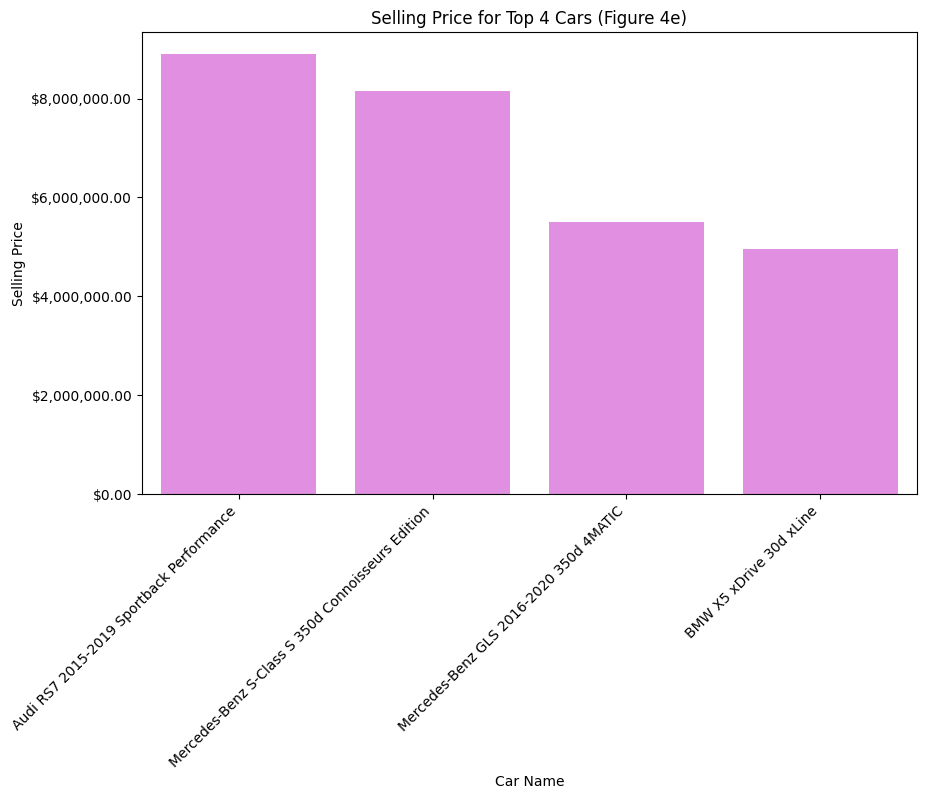

In [ ]:
top_4_selling_price = cars_df.nlargest(4, 'selling_price')
plt.figure(figsize=(10, 6))
sb.barplot(x='name', y='selling_price', data=top_4_selling_price, color='violet')
plt.title('Selling Price for Top 4 Cars (Figure 4e)')
plt.xlabel('Car Name')
plt.ylabel('Selling Price')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.2f}'))
plt.show()

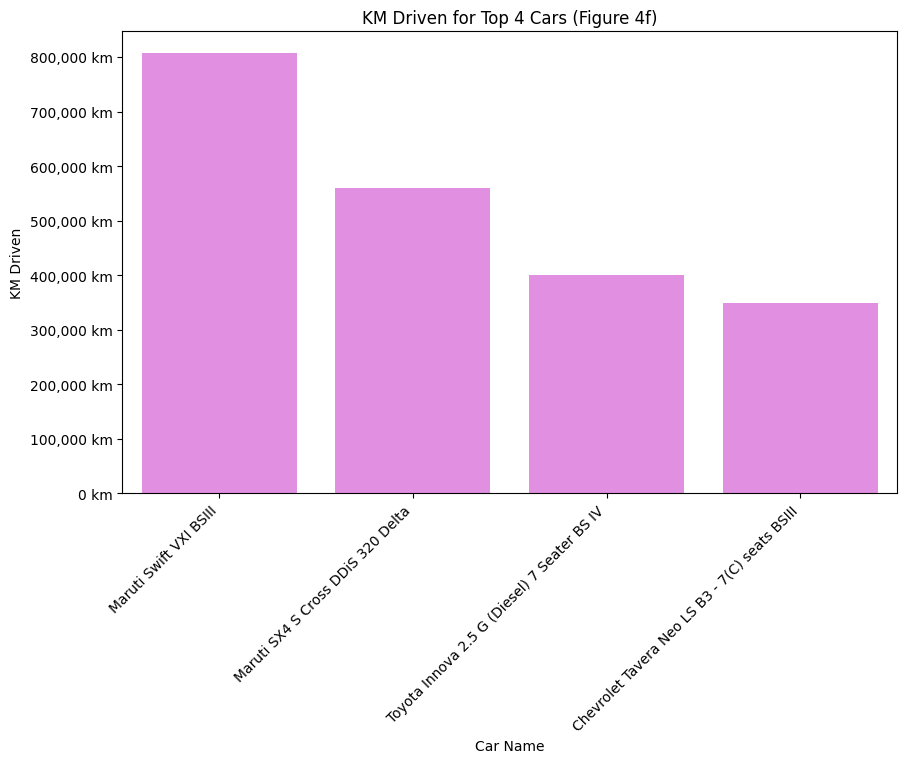

In [ ]:
top_kms_driven = cars_df.nlargest(10, 'km_driven')
top_unique_kms = top_kms_driven.drop_duplicates(subset=['km_driven']).head(4)
plt.figure(figsize=(10, 6))
sb.barplot(x='name', y='km_driven', data=top_unique_kms, color='violet')
plt.title('KM Driven for Top 4 Cars (Figure 4f)')
plt.xlabel('Car Name')
plt.ylabel('KM Driven')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f} km'))
plt.show()


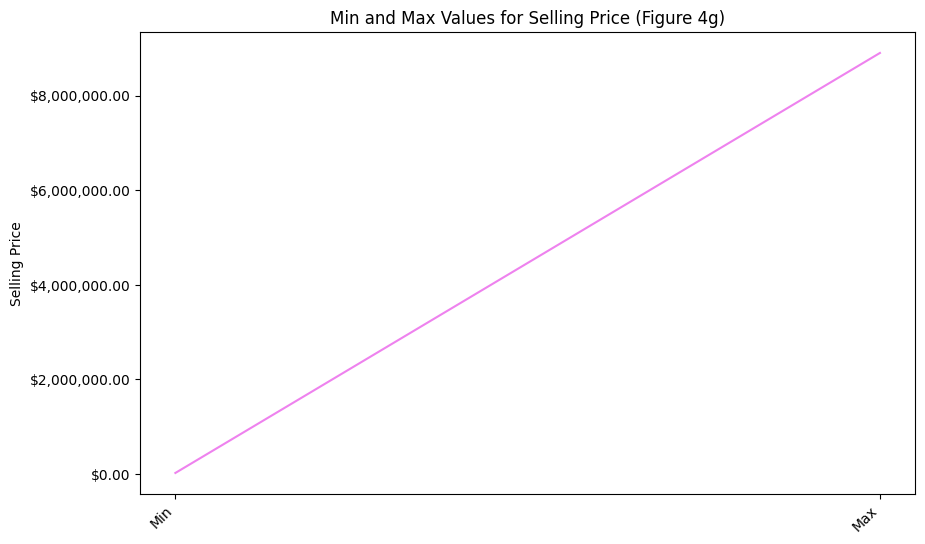

Minimum Selling Price: $20,000.00
Maximum Selling Price: $8,900,000.00


In [ ]:
min_selling_price = cars_df['selling_price'].min()
max_selling_price = cars_df['selling_price'].max()
min_max_df = pd.DataFrame({
    'Selling Price': [min_selling_price, max_selling_price]
}, index=['Min', 'Max'])
plt.figure(figsize=(10, 6))
min_max_df['Selling Price'].plot(kind='line', color='violet')
plt.title('Min and Max Values for Selling Price (Figure 4g)')
plt.ylabel('Selling Price')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.2f}'))
plt.xticks([0, 1], ['Min', 'Max'], rotation=45, ha='right')
plt.show()
print(f"Minimum Selling Price: ${min_selling_price:,.2f}")
print(f"Maximum Selling Price: ${max_selling_price:,.2f}")

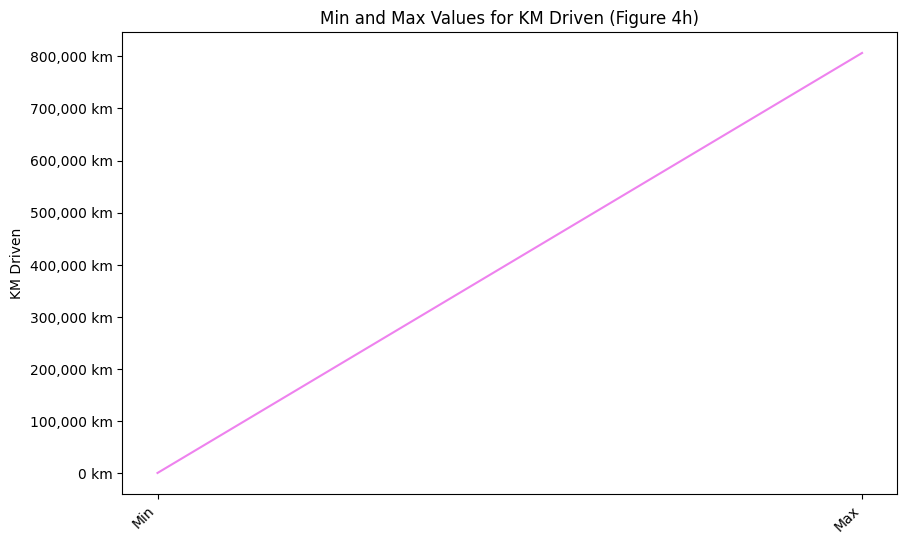

Minimum Kilometers Driven: 1 km
Maximum Kilometers Driven: 806,599 km


In [ ]:
min_km_driven = cars_df['km_driven'].min()
max_km_driven = cars_df['km_driven'].max()
min_max_df = pd.DataFrame({
    'Kilometers Driven': [min_km_driven, max_km_driven]
}, index=['Minimum', 'Maximum'])
plt.figure(figsize=(10, 6))
min_max_df['Kilometers Driven'].plot(kind='line', color='violet')
plt.title('Min and Max Values for KM Driven (Figure 4h)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f} km'))
plt.xticks([0, 1], ['Min', 'Max'], rotation=45, ha='right')
plt.ylabel('KM Driven')
plt.show()
print(f"Minimum Kilometers Driven: {min_km_driven:,.0f} km")
print(f"Maximum Kilometers Driven: {max_km_driven:,.0f} km")


In [ ]:
name_var = cars_df['name']
make_var = cars_df['Brand']
price_var = cars_df['selling_price']
year_var = cars_df['year']
transmission_var = cars_df['transmission']
seller_type_var = cars_df['seller_type']
fuel_var = cars_df['fuel']
km_driven_var = cars_df['km_driven']
owner_var = cars_df['owner']

df1 = cars_df.copy()


def top_3(col):
    make_counts = df1[col].value_counts()
    frequency = Counter(df1[col])
    most_popular = df1[col].mode()[0]
    most_popular_count = make_counts[most_popular]
    second_most_popular = frequency.most_common(2)[1][0]
    second_most_popular_count = make_counts[second_most_popular]
    third_most_popular = frequency.most_common(3)[2][0]
    third_most_popular_count = make_counts[third_most_popular]
    top_3_list = [most_popular, most_popular_count, second_most_popular,
                  second_most_popular_count, third_most_popular, third_most_popular_count]
    return top_3_list

def calculateCenter(col):
    m = st.mean(df1[col])
    me = st.median(df1[col].sort_values())
    mo = st.mode(df1[col])
    centerDict= {
        'mean':m,
        'median':me,
        'mode':mo
    }
    return centerDict





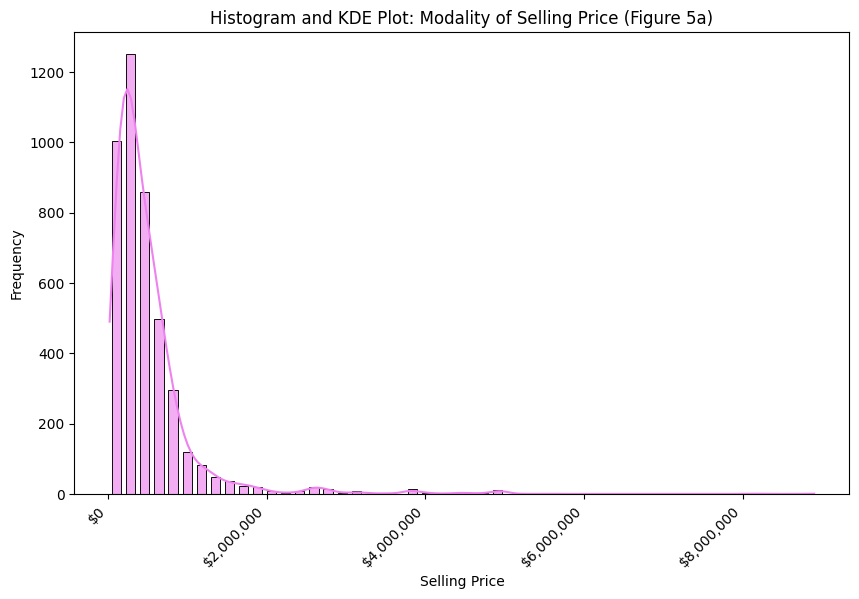

The most frequent selling price is: $300,000.00, with count: 162
The second most frequent selling price is: $250,000.00, with count: 125
The third most frequent selling price is: $350,000.00, with count: 122


In [ ]:

plt.figure(figsize=(10,6))

ax=sb.histplot(data=df1,x=df1['selling_price'],bins=50,color='violet', edgecolor='k', alpha=0.65,shrink=0.65, kde = True)

plt.xlabel("Selling Price",fontsize = 10)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Frequency")
plt.ticklabel_format(style='plain')
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.title('Histogram and KDE Plot: Modality of Selling Price (Figure 5a)',loc='center')
plt.show()

top_3_list = top_3('selling_price')
print(f"The most frequent selling price is: ${top_3_list[0]:,.2f}, with count: {top_3_list[1]}")
print(f"The second most frequent selling price is: ${top_3_list[2]:,.2f}, with count: {top_3_list[3]}")
print(f"The third most frequent selling price is: ${top_3_list[4]:,.2f}, with count: {top_3_list[5]}")



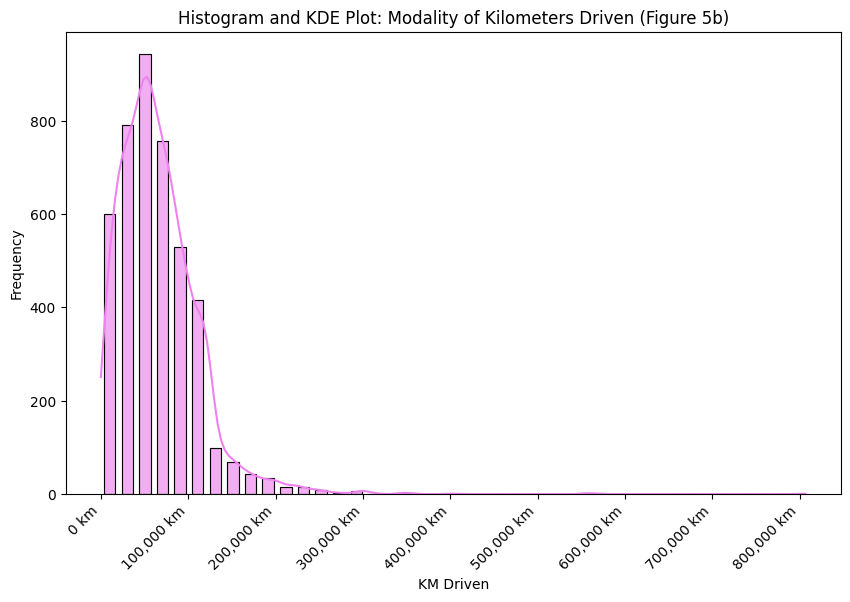

The most frequent kilometers driven on a car is: 70000km, with count: 236
The second most frequent kilometers driven on a car is: 80000km, with count: 228
The third most frequent kilometers driven on a car is: 50000km, with count: 222


In [ ]:

plt.figure(figsize=(10,6))

ax=sb.histplot(data=df1,x=df1['km_driven'],bins=40,color='violet', edgecolor='k', alpha=0.65,shrink=0.65, kde = True)

plt.xlabel("KM Driven",fontsize = 10)
plt.xticks(rotation=45, ha='right')


plt.ylabel("Frequency")
plt.ticklabel_format(style='plain')

ax.xaxis.set_major_formatter('{x:,.0f}')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f} km'))
plt.title('Histogram and KDE Plot: Modality of Kilometers Driven (Figure 5b)',loc='center')
plt.show()



top_3_list = top_3('km_driven')
print(f"The most frequent kilometers driven on a car is: {top_3_list[0]}km, with count: {top_3_list[1]}")
print(f"The second most frequent kilometers driven on a car is: {top_3_list[2]}km, with count: {top_3_list[3]}")
print(f"The third most frequent kilometers driven on a car is: {top_3_list[4]}km, with count: {top_3_list[5]}")




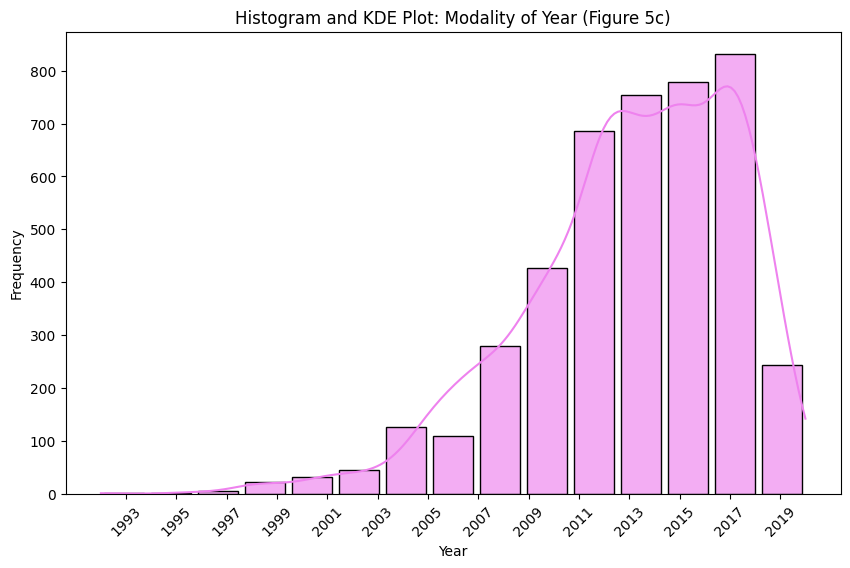

The most frequent year of a car is: 2017, with count: 466
The second most frequent year of a car is: 2015, with count: 421
The third most frequent year of a car is: 2012, with count: 415


In [ ]:

plt.figure(figsize=(10,6))
sb.histplot(data=df1,x=df1['year'], bins=15,color='violet', kde = True, edgecolor='k', alpha=0.65,shrink=0.85)
plt.xlabel("Year",fontsize = 10)
plt.ylabel("Frequency")

plt.xticks([num for num in range(1993,2020,2)],
            [str(num) for num in range(1993,2020,2)], rotation = 45)
plt.title("Histogram and KDE Plot: Modality of Year (Figure 5c)")
plt.show()

top_3_list = top_3('year')
print(f"The most frequent year of a car is: {top_3_list[0]}, with count: {top_3_list[1]}")
print(f"The second most frequent year of a car is: {top_3_list[2]}, with count: {top_3_list[3]}")
print(f"The third most frequent year of a car is: {top_3_list[4]}, with count: {top_3_list[5]}")


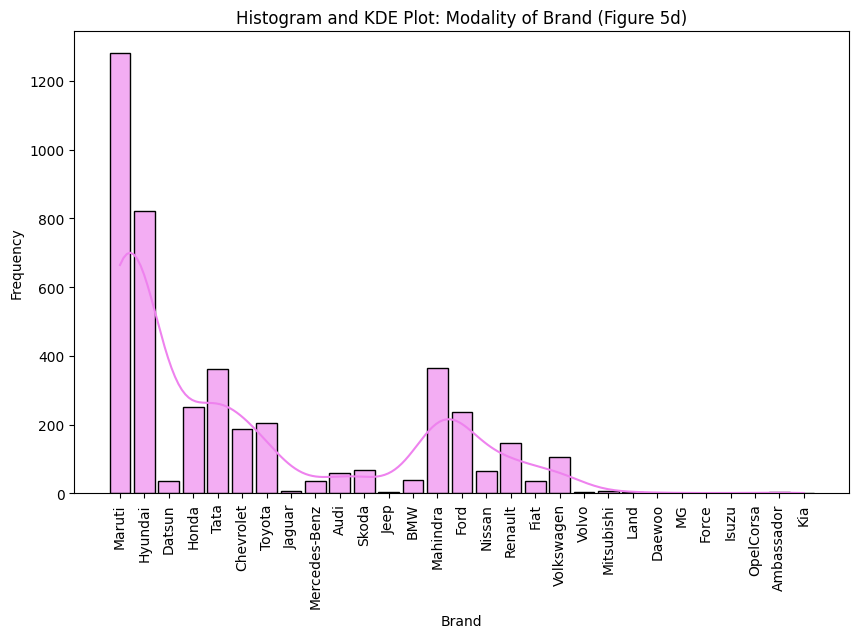

The most frequent Brand of car is: Maruti, with count: 1280
The second most frequent Brand of car is: Hyundai, with count: 821
The third most frequent Brand of car is: Mahindra, with count: 365


In [ ]:
make_counts = df1['Brand'].value_counts()

plt.figure(figsize=(10,6))
sb.histplot(data=df1,x=df1['Brand'], bins=len(make_counts),color='violet', kde = True, edgecolor='k', alpha=0.65,shrink=0.85)
plt.xlabel("Brand",fontsize = 10)
plt.ylabel("Frequency")
plt.xticks( rotation = 90)
plt.title("Histogram and KDE Plot: Modality of Brand (Figure 5d)")
plt.show()

top_3_list = top_3('Brand')
print(f"The most frequent Brand of car is: {top_3_list[0]}, with count: {top_3_list[1]}")
print(f"The second most frequent Brand of car is: {top_3_list[2]}, with count: {top_3_list[3]}")
print(f"The third most frequent Brand of car is: {top_3_list[4]}, with count: {top_3_list[5]}")

,km_driven,selling_price
0,53302.684659,7.218835e+05
1,31106.609756,4.546293e+06
2,74309.270270,2.473640e+05
3,49621.836601,2.011895e+06


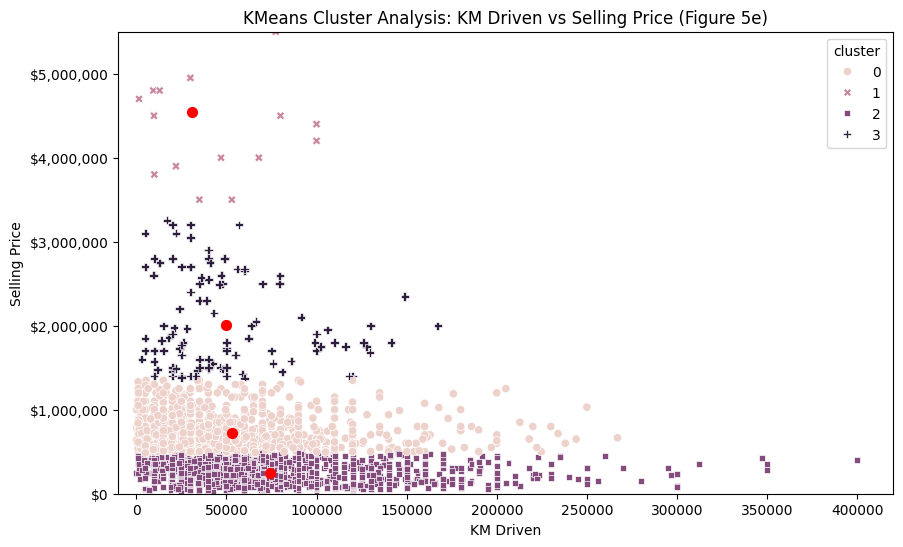

In [ ]:
pd.options.mode.copy_on_write = True
driven_price = cars_df[['km_driven', 'selling_price']]

kmeans = KMeans(n_clusters = 4, n_init = 10).fit(driven_price)

driven_price.loc[:, 'cluster'] = kmeans.labels_

centers = pd.DataFrame(kmeans.cluster_centers_, columns=['km_driven', 'selling_price'])

display(centers)

fig, ax = plt.subplots(figsize =(10,6))
plt.title("KMeans Cluster Analysis: KM Driven vs Selling Price (Figure 5e)")
ax = sb.scatterplot(x='km_driven', y='selling_price', hue='cluster', style = 'cluster',ax = ax, data = driven_price)
ax.set_ylim(-1000, 5500000)
ax.set_xlim(-10000, 420000)
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))


centers.plot.scatter(x='km_driven', y = 'selling_price', ax = ax, s=50, color = 'red')
ax.set_ylabel("Selling Price")
ax.set_xlabel("KM Driven")
plt.show()

,year,selling_price
0,2016.027523,8.834706e+05
1,2017.010753,3.513581e+06
2,2011.961356,2.845000e+05


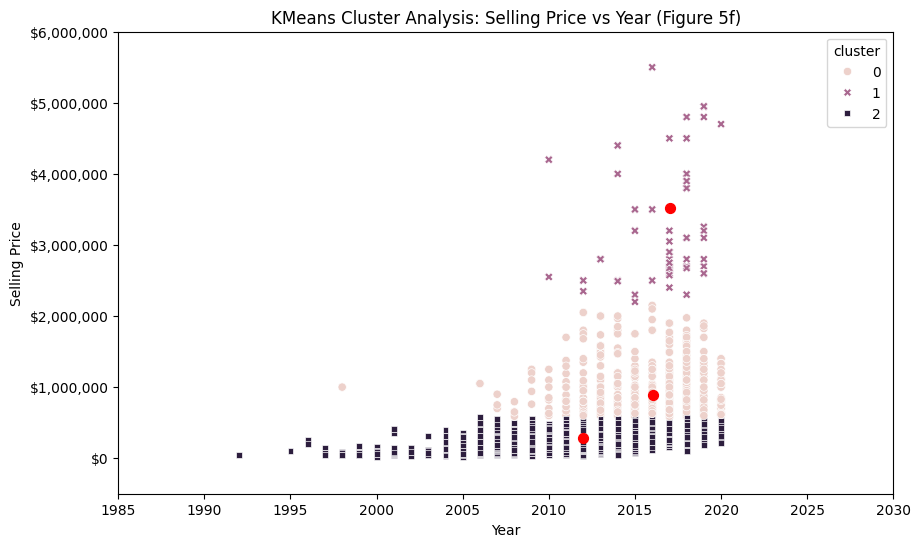

In [ ]:

year_price_df = cars_df[['year', 'selling_price']]


kmeans = KMeans(n_clusters = 3, n_init=10).fit(year_price_df)
year_price_df = year_price_df.copy()

year_price_df.loc[:,'cluster'] = kmeans.labels_

centers = pd.DataFrame(kmeans.cluster_centers_, columns=['year', 'selling_price'])

display(centers)


fig, ax = plt.subplots(figsize=(10,6))
ax = sb.scatterplot(x='year', y='selling_price', hue='cluster', style='cluster', ax=ax, data=year_price_df)

ax.set_xlim(1985, 2030)
ax.ticklabel_format(style='plain', axis='y')
ax.set_ylim(-500000, 6000000)

ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))

ax.set_title('KMeans Cluster Analysis: Selling Price vs Year (Figure 5f)')

centers.plot.scatter(x='year', y='selling_price', ax=ax, s=50, color='red')

ax.set_xlabel('Year')
ax.set_ylabel('Selling Price')
plt.show()


,year,km_driven
0,2010.398438,223113.617188
1,2012.373231,63238.275943
2,2010.812144,110406.358634
3,2015.801642,24074.906293


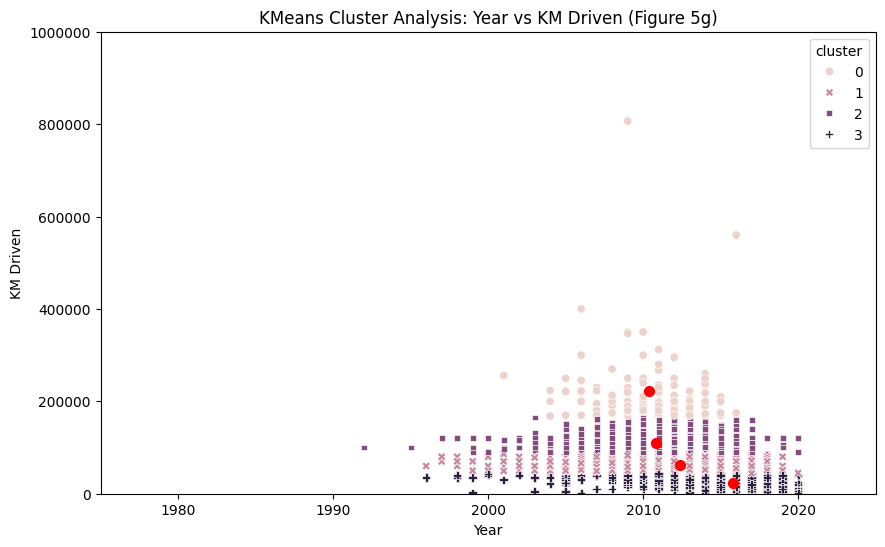

In [ ]:

year_km_driven = cars_df[['year', 'km_driven']]

kmeans = KMeans(n_clusters= 4, n_init = 10).fit(year_km_driven)
year_km_driven = year_km_driven.copy()
year_km_driven.loc[:,'cluster'] = kmeans.labels_

centers = pd.DataFrame(kmeans.cluster_centers_, columns = ['year', 'km_driven'])

display(centers)

fig, ax = plt.subplots(figsize = (10,6))
ax = sb.scatterplot(x='year', y = 'km_driven', hue = 'cluster', style='cluster',
                      ax = ax, data = year_km_driven)


ax.set_xlim(1975, 2025)
ax.set_ylim(0, 1000000)
ax.ticklabel_format(style='plain', axis='y')

ax.set_title('KMeans Cluster Analysis: Year vs KM Driven (Figure 5g)')
centers.plot.scatter(x='year', y='km_driven', ax = ax, s=50, color = 'red')
ax.set_ylabel("KM Driven")
ax.set_xlabel("Year")
plt.show()

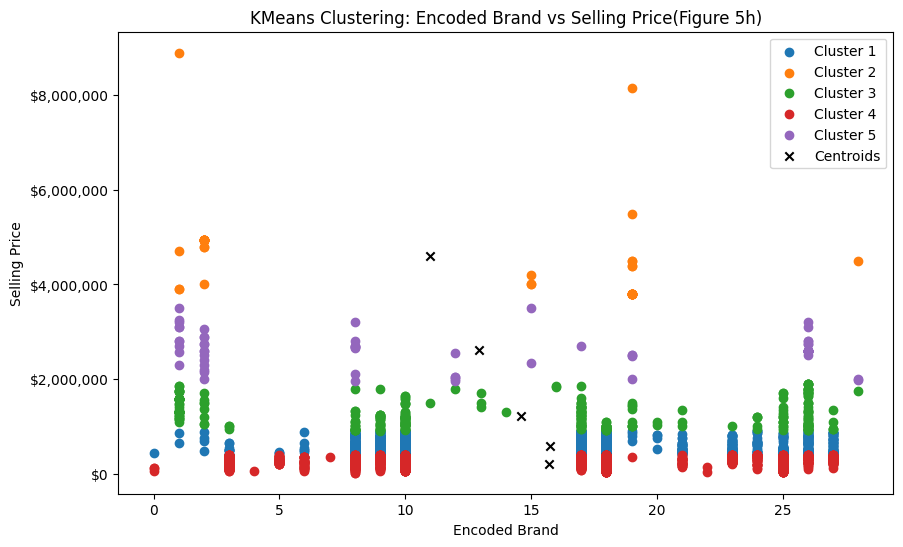

Center Selling Prices: [214858.3866266632, 586195.4361290331, 1215416.4079320095, 2609307.6769230766, 4599948.717948717]
Center of encoded Brands: [10.974358974358974, 12.938461538461539, 14.61756373937677, 15.716673810544364, 15.767096774193547]


In [ ]:
label_encoder = LabelEncoder()
cars_df['brand_encoded'] = label_encoder.fit_transform(cars_df['Brand'])

X = cars_df[['selling_price', 'brand_encoded']]

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, n_init = 10, random_state=42)
kmeans.fit(X)

cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

cars_df.loc[:,'cluster'] = labels


plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    cluster_data = cars_df[cars_df['cluster'] == i]
    plt.scatter(cluster_data['brand_encoded'], cluster_data['selling_price'], label=f'Cluster {i+1}')

plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], color='black', marker='x', label='Centroids')

plt.xlabel('Encoded Brand')
plt.ylabel('Selling Price')
plt.title('KMeans Clustering: Encoded Brand vs Selling Price(Figure 5h)')
plt.ticklabel_format(style = 'plain', axis='y')
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.legend()
plt.show()

cluster_make_counts = cars_df.groupby(['cluster', 'brand_encoded'])['Brand'].value_counts()



print("Center Selling Prices:", sorted(cluster_centers[:, 0]))
print("Center of encoded Brands:",sorted(cluster_centers[:, 1]))
plt.show()

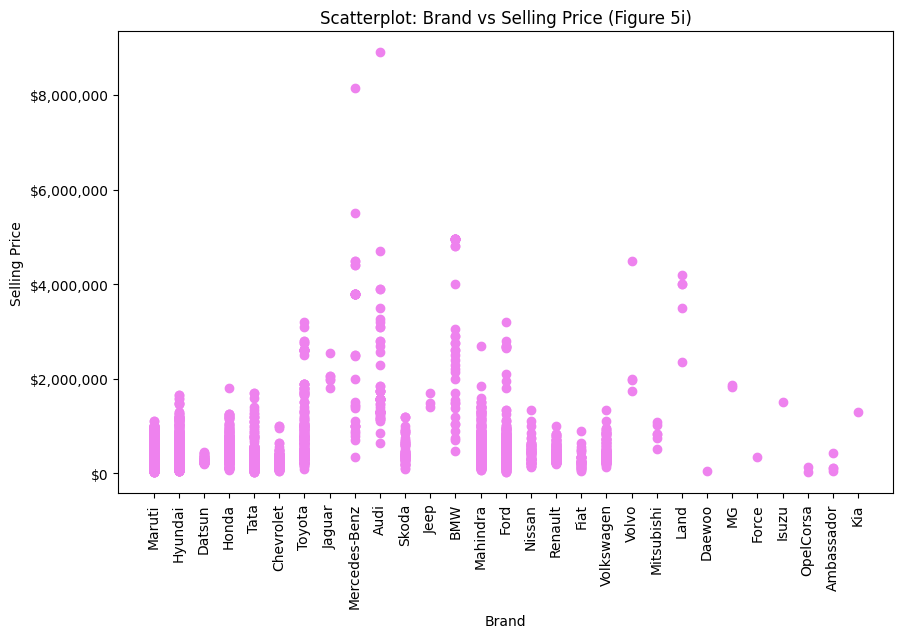

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(make_var, price_var, color = 'violet')
plt.xlabel('Brand')
plt.xticks(rotation = 90)
plt.ylabel('Selling Price')
plt.ticklabel_format(style = 'plain', axis='y')
plt.title('Scatterplot: Brand vs Selling Price (Figure 5i)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.show()

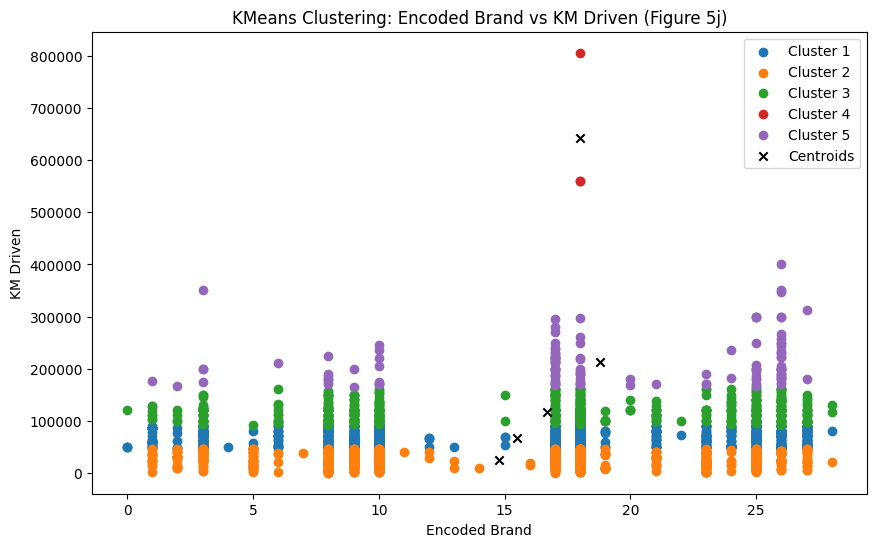

Center KM Driven: [25219.530401034914, 67394.02767227347, 116066.19244823392, 212306.64566929138, 642199.6666666666]
Center of encoded Brands: [14.779430789133258, 15.485078676071621, 16.696711327649215, 18.0, 18.779527559055115]


In [ ]:
label_encoder = LabelEncoder()
cars_df['brand_encoded'] = label_encoder.fit_transform(cars_df['Brand'])

X = cars_df[['km_driven', 'brand_encoded']]

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, n_init = 10, random_state=42)
kmeans.fit(X)

cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

cars_df.loc[:,'cluster'] = labels


plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    cluster_data = cars_df[cars_df['cluster'] == i]
    plt.scatter(cluster_data['brand_encoded'], cluster_data['km_driven'], label=f'Cluster {i+1}')

plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], color='black', marker='x', label='Centroids')

plt.xlabel('Encoded Brand')
plt.ylabel('KM Driven')
plt.title('KMeans Clustering: Encoded Brand vs KM Driven (Figure 5j)')
plt.ticklabel_format(style = 'plain', axis='y')
plt.legend()
plt.show()

cluster_make_counts = cars_df.groupby(['cluster', 'brand_encoded'])['Brand'].value_counts()



print("Center KM Driven:", sorted(cluster_centers[:, 0]))
print("Center of encoded Brands:",sorted(cluster_centers[:, 1]))
plt.show()

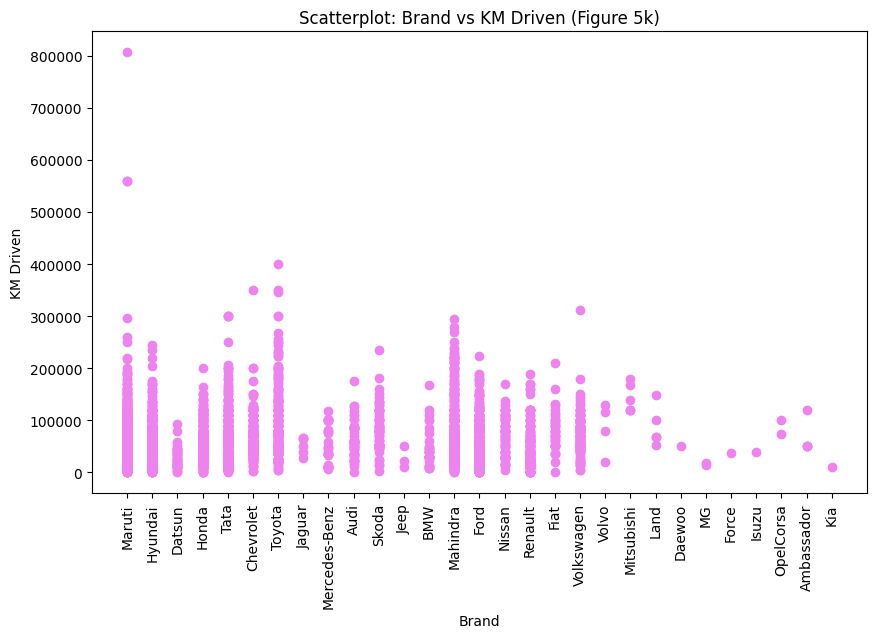

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(make_var, km_driven_var, color = 'violet')
plt.xlabel('Brand')
plt.xticks(rotation = 90)
plt.ylabel('KM Driven')

plt.title('Scatterplot: Brand vs KM Driven (Figure 5k)')
plt.show()

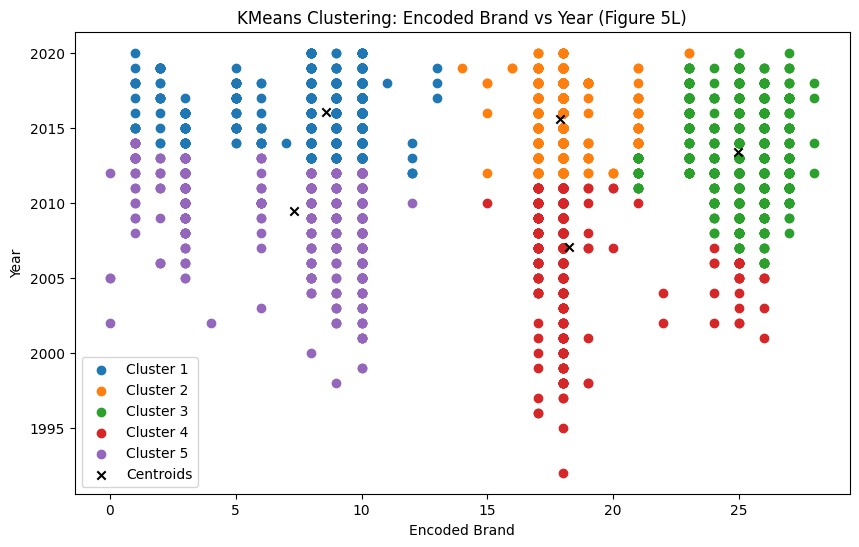

Center Selling Prices: [2007.0523731587562, 2009.4756995581738, 2013.3878241262682, 2015.5944540727903, 2016.0555004955402]
Center of encoded makes [7.3240058910162205, 8.573835480673955, 17.875216637781648, 18.238952536824893, 24.95941375422774]


In [ ]:
label_encoder = LabelEncoder()
cars_df['make_encoded'] = label_encoder.fit_transform(cars_df['Brand'])

X = cars_df[['year', 'make_encoded']]

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, n_init = 10, random_state=42)
kmeans.fit(X)

cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

cars_df.loc[:,'cluster'] = labels


plt.figure(figsize=(10, 6))
for i in range(num_clusters):
    cluster_data = cars_df[cars_df['cluster'] == i]
    plt.scatter(cluster_data['make_encoded'], cluster_data['year'], label=f'Cluster {i+1}')

plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], color='black', marker='x', label='Centroids')
plt.ticklabel_format(style = 'plain', axis='y')
plt.xlabel('Encoded Brand')
plt.ylabel('Year')
plt.title('KMeans Clustering: Encoded Brand vs Year (Figure 5L)')
plt.legend()
plt.show()

cluster_make_counts = cars_df.groupby(['cluster', 'make_encoded'])['Brand'].value_counts()



print("Center Selling Prices:", sorted(cluster_centers[:, 0]))
print("Center of encoded makes",sorted(cluster_centers[:, 1]))
plt.show()

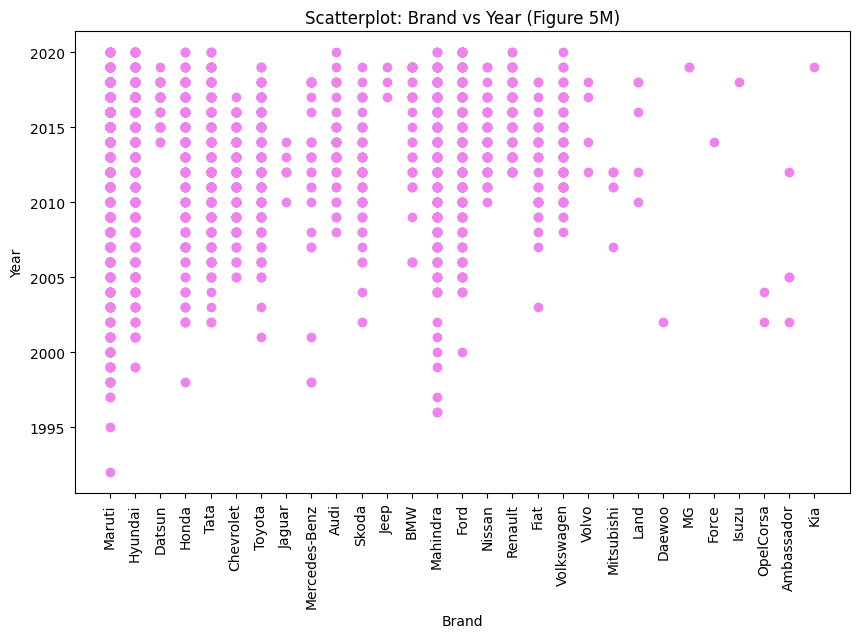

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(make_var, year_var, color = 'violet')
plt.ylabel('Year')
plt.xlabel('Brand')
plt.xticks(rotation = 90)
plt.title("Scatterplot: Brand vs Year (Figure 5M)")
plt.show()

<h1>Results<h1>


Analyzing skew in numeric data distributions provides valuable insights into the underlying patterns and outliers within the dataset. Taller bars in a histogram indicate regions where the data is more densely populated, thereby offering clearer indications of central tendencies and the presence of outliers.
In the case of selling prices, depicted in Figure 1a, the pronounced right skew suggests that most cars are clustered around the 100,000 dollar mark. This concentration signifies a common price range within the dataset. However, the presence of an evident outlier, with a value of 8,000,000 dollars, significantly distorts the distribution. This outlier, protruding from the bulk of the data, highlights the presence of exceptionally high-priced vehicles within the dataset, potentially indicating unique or rare models.
Similarly, when examining the distribution of kilometers driven, as illustrated in Figure 1b, another right skew is observed. This skew indicates a concentration of vehicles around the 80,000 km mark, suggesting that many cars in the dataset have similar mileage. However, a notable outlier extends the tail of the distribution to an astonishing 800,000 kilometers. This outlier represents a vehicle with exceptionally high mileage compared to the rest of the dataset, potentially indicating an outlier in terms of usage or maintenance history. In both cases, the presence of outliers significantly impacts the distribution of the data, highlighting the importance of identifying and understanding these outliers in data analysis. By recognizing and addressing outliers, analysts can better understand the underlying patterns and make more informed decisions based on the data.


Analyzing outliers within the dataset reveals intriguing insights into the automotive industry's pricing dynamics. In Figure 2a, two notable anomalies emerge in Year vs Selling Price. The first anomaly is a car sold for 8.9 million dollars in 2016, followed by another at 8.1 million dollars in 2017. These outliers significantly impact the dataset's mean selling price, standing outside the usual pricing trends.
Delving into these outliers, we uncover that despite their exorbitant prices, both cars exhibited remarkably low mileage (Figure 2c), suggesting they were likely new vehicles. Moreover, they were petrol- and diesel-powered (Figure 2j), sold by dealers (Figure 2k), and featured automatic transmissions (Figure 2l), all contributing to their premium pricing. Notably, these cars were bought by their initial owners (Figure 2m), adding a layer of exclusivity.
Further outliers come to light, such as a car in 2009 with a staggering mileage of 806,599 km and another in 2016 with 560,000 km (Figure 2b). These instances starkly contrast with the overall mileage trends in the dataset. Surprisingly, despite their high mileage, these cars commanded relatively high selling prices of 250,000 dollars and 665,000 dollars (Figure 2c), defying the norm where higher-mileage vehicles usually have lower market prices.
Upon closer examination of these high-mileage outliers, we find their selling prices align with the dataset's general pricing patterns, contrary to the expected trend of lower prices for higher mileage vehicles. Additionally, they share similarities with the premium outliers in terms of being petrol- and diesel-powered (Figure 2o), sold by dealers (Figure 2p), featuring manual transmissions (Figure 2q), and being first-owned vehicles (Figure 2r).
These observations underscore the intricate interplay of factors influencing vehicle pricing, highlighting how outliers can provide valuable insights into market dynamics, consumer preferences, and the unique characteristics that drive premium pricing in the automotive sector.

From the measures of central tendency (center point) perspective, these are summary statistics that represent the center point or typical value of a dataset. These statistics indicate where most values in a distribution fall and are also referred to as the central location of a distribution. We can also think of central tendency as the propensity for data points to cluster around a middle value. From the dataset it can be seen that for both selling price (Figure 3a) and kilometer driven (Figure 3b) they have a non-symmetric distribution.
For the Selling Price (Figure 3a) and Kilometer driven (Figure 3b) as the data is skewed right, the Mean value is greater than Median (Mean>Median). Due to non-symmetric distribution the mean is starting to fall outside the central area. This problem occurs because outliers have a substantial impact on the mean as a measure of central tendency. Extreme values in an extended tail pull the mean away from the center. As the distribution becomes more skewed, the mean is drawn further away from the center. Consequently, in this situation it’s best to use the median as a measure of the central tendency when we have a non-symmetric distribution and for symmetric(skewed) distribution, the mean will be chosen as the central point of tendency.
Further we found that for the selling price (Figure 3a) most of the distribution is falling between the range of 3,50,000 dollars where the average selling price of most of the cars is 5,04,127 dollars and most common selling price for cars is 3,00,000 dollars. Same way for the kilometer driven (Figure 3b) most common mileage of cars is 70,000 miles and the average kilometer driven for cars is 66,215. The distribution for the kilometer driven is falling between the range of 60,000 miles.
For the year (Figure 3c) , we found 2017 is the year that occurs the most frequently in the data set. Also, in car dataset for Owner type (Figure 3d), the First Owner is the mode of this distribution because it is the most common value in the data for the owner type.

My analysis provides a comprehensive look at the dynamics of car sales, focusing on selling prices and kilometers driven. By combining insights from the top cars in terms of price and usage with descriptive statistics, I've offered a robust view of the market. The boxplot (Figure 4c) visualizes the distribution of selling prices, highlighting skewness towards higher values and showcasing variability crucial for understanding the price landscape. The bar plot for the top 4 cars (Figure 4e) focuses on selling prices of the highest-priced cars, underscoring premium features and brand value. Another boxplot (Figure 4d) shows the distribution of kilometers driven, emphasizing right skew and highlighting cars with extensive mileage, indicating durability and robust performance. A corresponding bar plot (Figure 4f) illustrates the mileage of the cars that have been driven the most, offering insights into models that maintain performance over long-term use. Line charts for selling prices and kilometers driven (Figures 4g and 4h) provide a quick reference for the range of prices and mileage within my dataset, setting expectations for both low and high-budget buyers. These visualizations not only aid in understanding the market's breadth and depth but also cater to specific buyer needs, helping identify high-value cars for luxury buyers and well-maintained, high-mileage cars for value-oriented buyers. Overall, this detailed exploration through tailored visualizations offers a clear, data-driven picture of the car market's distribution characteristics, essential for anyone looking to deeply understand market dynamics or considering buying a car based on rigorous data-driven insights.

Analyzing the modality and clusters present in the datas numeric fields and one of the categorical fields we can see trends in popularity of cars and the relationship or lackthere of between fields in the data set. Modality is looking at the most frequent values (mode(s)) of data and determining the number of peaks in the data (1 peak unimodal, 2 peaks bimodal, 3 or more peaks multimodal). The modality of Selling Price is unimodal with only one peak or bump in the data as seen in (Figure 5a). Furthermore, looking at the values for the top 3 most popular selling prices we can see that the most popular prices are between $250 -350 thousand dollars, with the mode or most frequent/popular price being 300,000 dollars. The modality of Kilometers Driven is similarily unimodal with only one peak or bump as seen in (Figure 5b). Furthermore, looking at the values for the top 3 most popular kilometers driven values we can see that the most popular kilometers driven values are bewteen 50,000km and 80,000km with the mode or most frequent/popular kilometers driven value being 70,000km.The Modality of Year is bimodal, with the two peaks as seen in (Figure 5c). Looking at the values for the top 3 Years for cars we can see that the top 3 years at 2017, which is the mode as well as our main peak with a count of 466, 2015 with a count of 421 which looks like it could be peak but if you raise the year 2016 to its right it would level out so it is not classified as a peak by modality standards, and 2012 our second peak with a value of 415, thus making (Figure 5c) bimodal. Modality of Brand is multimodal with no indication of any trend as seen in (Figure 5d). The top 3 most popular car brands are Maruti, our first peak and our mode with a count of 1280 (29.4% of total), Hyundai, which is coincedentally right next to Maruti, with a count of 821, and Mahindra, which is in the middle of our data set and our third peak with a count of 365. That wraps up the modality of our car dataset's "Selling Price", "KM Driven", "Year", and "Brand". Next we move on to anlyzing the clusters of our car dataset using KMeans cluster analysis. KMeans cluster analysis is a clustering algorithm deployed to discover groups that haven't been explicitly labeled within the data and has a variety of uses in business applications and machine learning. Looking at the different clusters created in (Figure 5e) as well as the centers of the clusters created, we can see a negative coorelation between Selling Price and KM Driven. The more KM Driven on a var the lower the selling price on average. In other words, the more KM Driven the lower the Price. Looking at the different clusters created in (Figure 5f) as well as the centers of the clusters created, we can see a positive coorelation between Year and Selling Price, with the higher the year the greater the selling price on average for cars. In other words, the newer the car the higher the selling price. Looking at the different clusters created in (Figure 5g)  as well as the centers of the clusters created, we can see a negative coorelation between Year and KM Driven as the Year increases KM Driven deceases on average. In other words the newer the car the less KM Driven on average. Looking at the different clusters created in (Figure 5h) as well as the centers of the clusters created, we can see no coorelation between car Brand and Selling Price, in order to run the KMeans analysis on the categorical Brand field we had to convert the field into a numerical value, so in (Figure 5h) we can't see what Brands are associated with the selling price. (Figure 5i) is a scatter plot that shows the selling price per brand to illuminate the mystery. Looking at the different clusters and their centers in (Figure5j) we can see no coorelation betwen KM Driven and Brand. Like (Figure 5h) we encoded brand to run KMeans analysis in (Figure 5j) so need to use (Figure 5k) to see what Brand is associated with KM Driven. The same lack of coorelation can be seen between Brand and Year in (Figure 5L) which because of the encoded brand name needs to be explained by (Figure 5M) and that sums up the results of my analysis.

<h1>Conclusion<h1>


We can see that selling price is right skewed caused by a couple outliers we have identified as being an Audi RS7 Sportback Performance at 8.9 million dollars and the other outlier being a Mercede's Benz S-Class S 350d Connoisseurs Edition (figure 4e). The mean is moving closer to the left for selling price because of the non-symmetrical distribution (Figure 3a). Cars with lower selling prices are concluded to be more popular, with the most popular price being 300,000 dollars (Figure 5a). Looking at the modality of selling price the most popular price range is between 250,000 and 350,000 dollars. Looking at the KMeans cluster analysis, we can also see that there is a negative correlation between selling price and kilometers driven (Figure 5e). There is a positive correlation between selling price and year (Figure 5f). There is no correlation between selling price and brand.

Kilometers driven also shows a strong skewness caused by two different outliers, Maruti Swift VXI BSIII at 806,599 kilometers and the Maruti SX4 S Cross DDiS 320 Delta at 560,000 kilometers driven (Figure 2b). We can see a very slight leftwards skew in the frequency of year (Figure 5c), but this skew is not caused by outliers. The reason for the skewness is caused by the popularity of relatively newer cars. The mean is moving closer to the left due to the non-symmetrical distribution (Figure 3b). The most popular kilometers driven on a car is 70,000 kilometers. The most popular range of cars is between 50,000 and 80,000 kilometers (Figure 5b).
Looking at the KMeans cluster analysis of year vs kilometers driven (Figure 5g) we can see a negative correlation.

Cars that have more kilometers driven are cheaper and newer cars are more expensive. Newer cars have less kilometers driven on them, on average. There is no correlation between band and kilometers driven. Out of 4340 cars 1280 were made by Maruti showing us that over 1 in 4 cars are made by Maruti.





